In [2]:
############### 1.1.	Data Cleaning and Preparation: ###########333

In [3]:
import pandas as pd 
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\EDA1\\Cardiotocographic.csv")
df.head()


LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

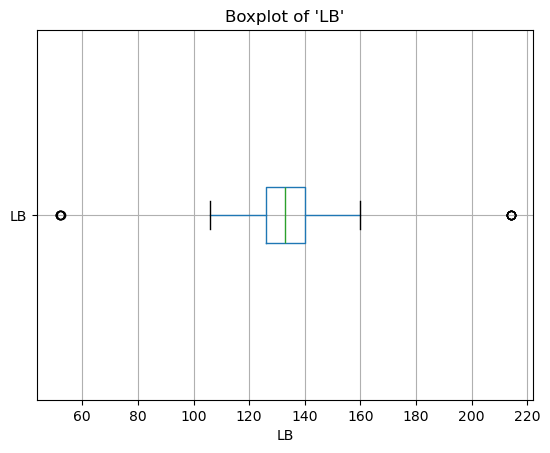

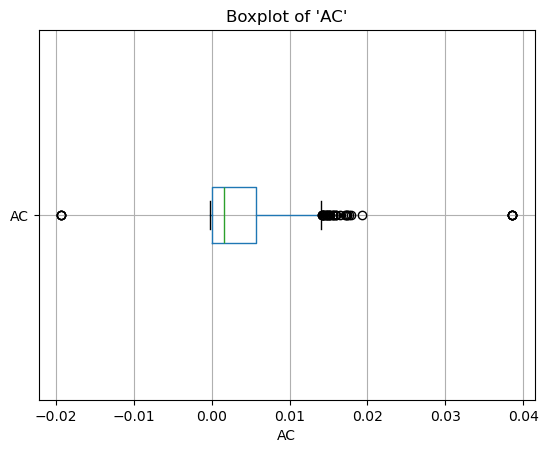

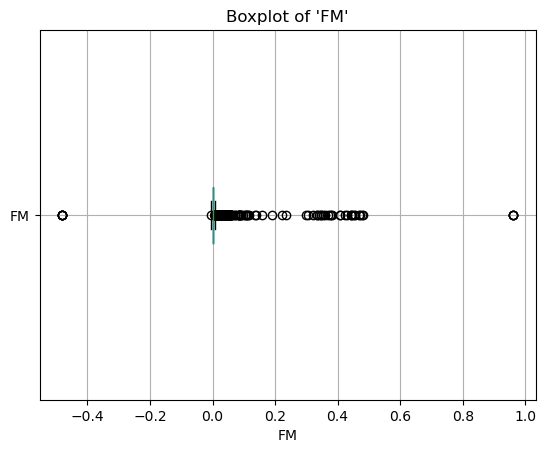

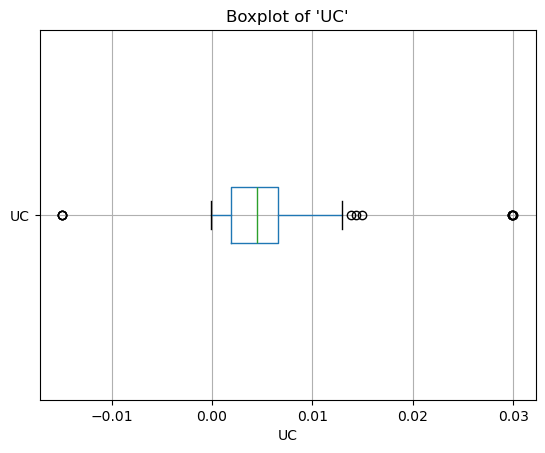

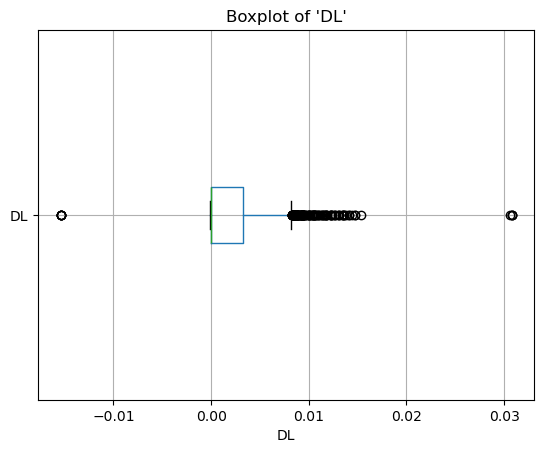

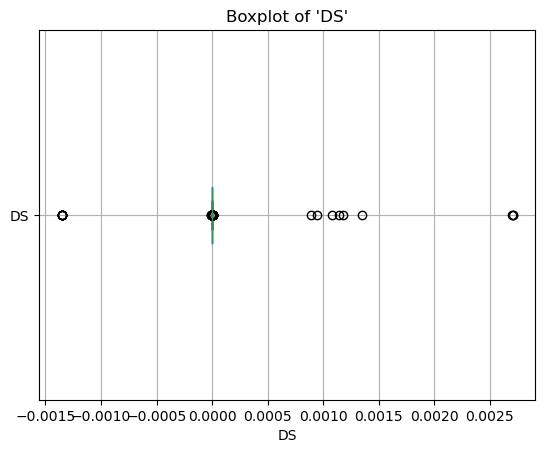

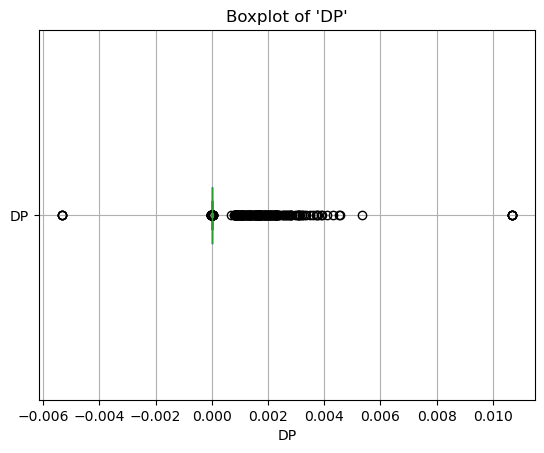

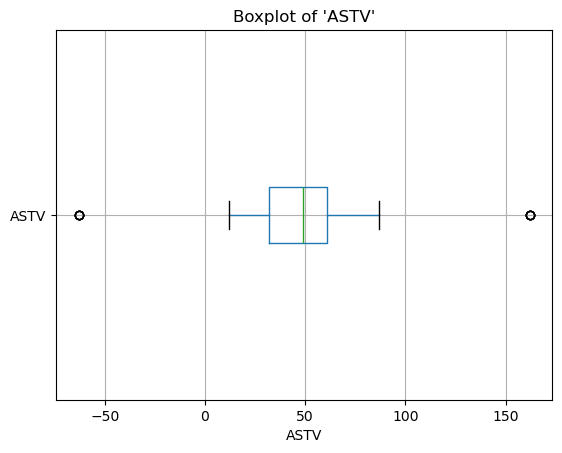

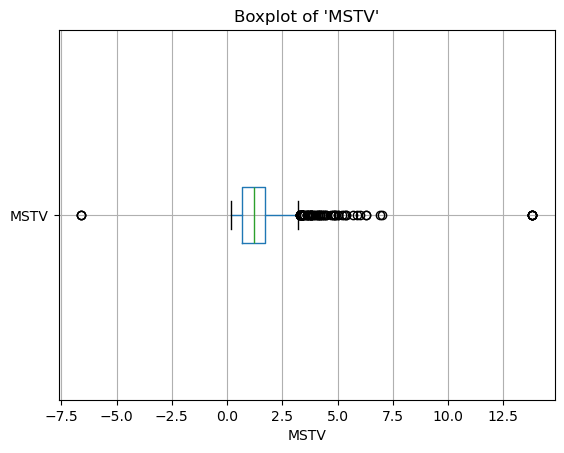

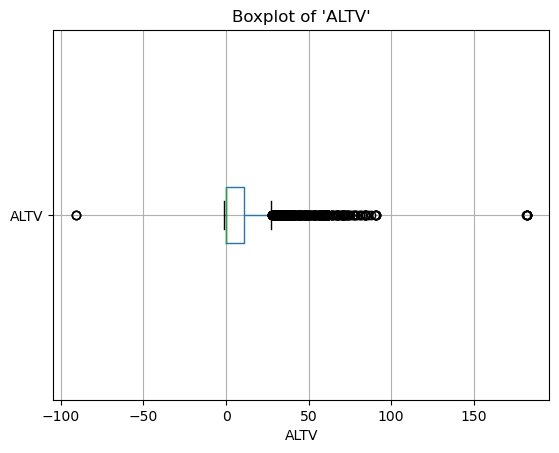

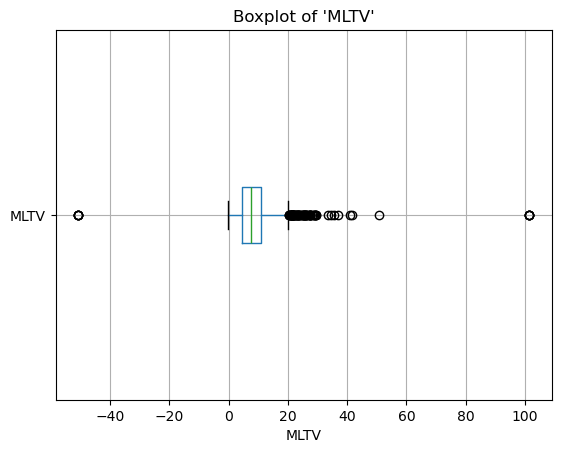

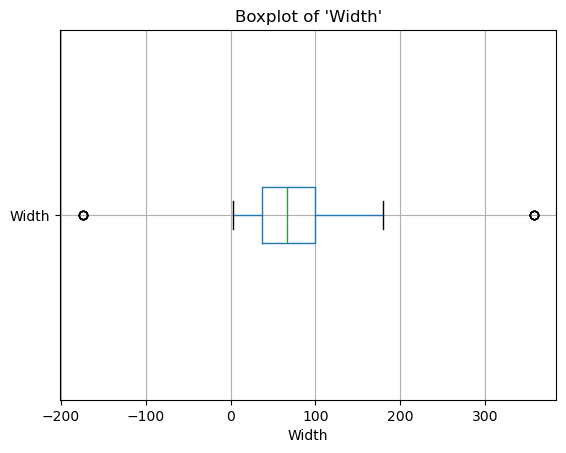

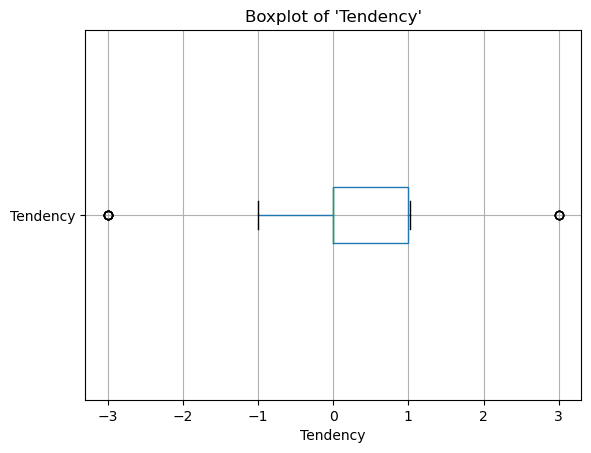

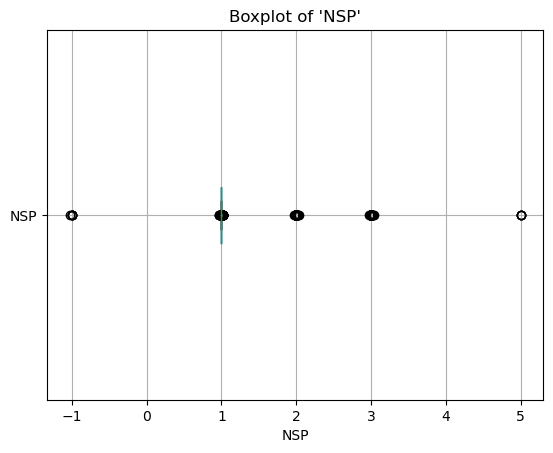

In [4]:
#### boxplot of all columns
import seaborn as sns
import matplotlib.pyplot as plt
for i in df:
    plt.figure()
    df.boxplot(i,vert=False)
    plt.title(f"Boxplot of '{i}'")
    plt.xlabel(i)
    plt.show()

In [5]:
# Calculate the number of outliers for each column
outliers_count = {}
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    outliers_count[i] = outliers.shape[0]
    
# Filter columns with more than 30 outliers

columns_with_many_outliers = []
for col, count in outliers_count.items():
    if count >= 30:
        columns_with_many_outliers.append(col)
print(columns_with_many_outliers)



['AC', 'FM', 'DL', 'DS', 'DP', 'MSTV', 'ALTV', 'MLTV', 'NSP']


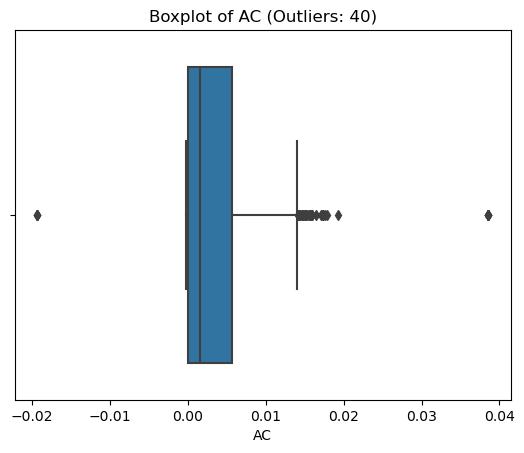

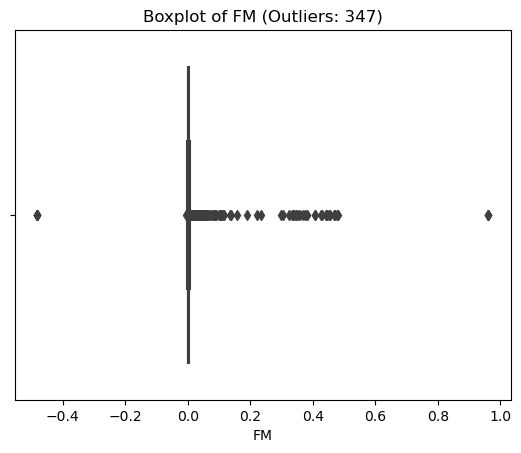

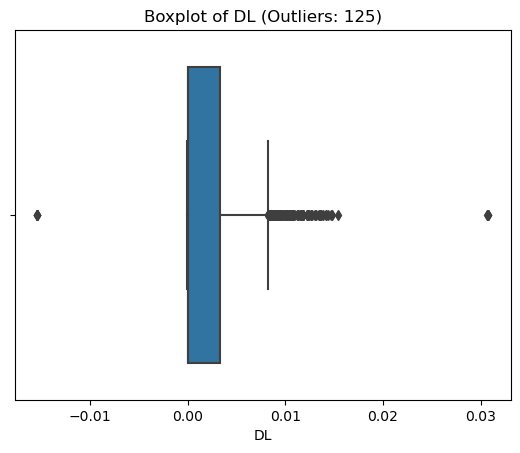

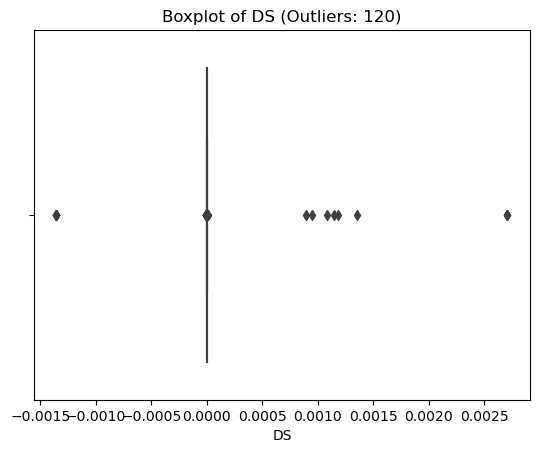

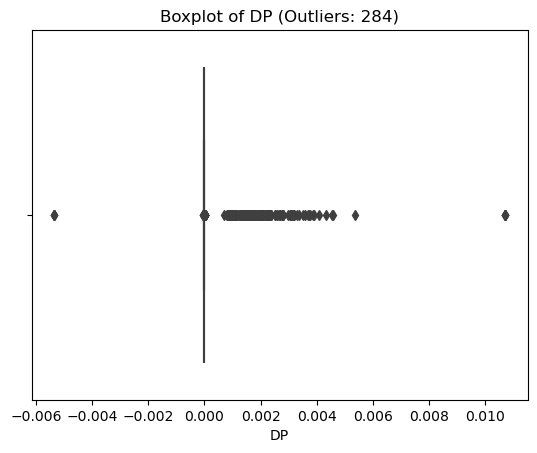

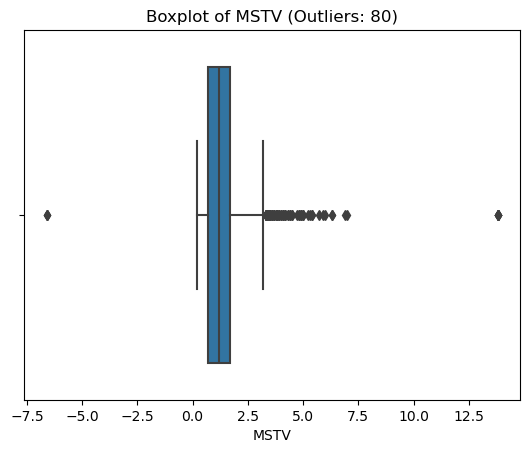

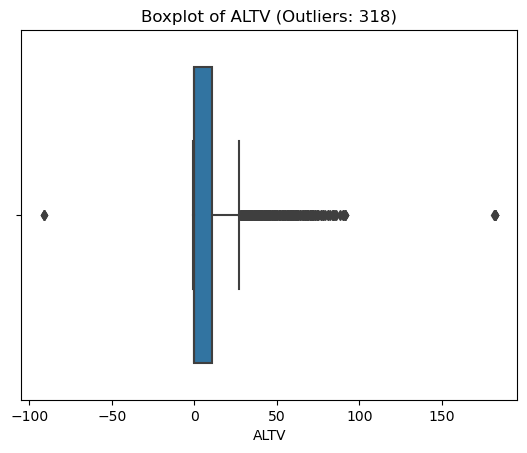

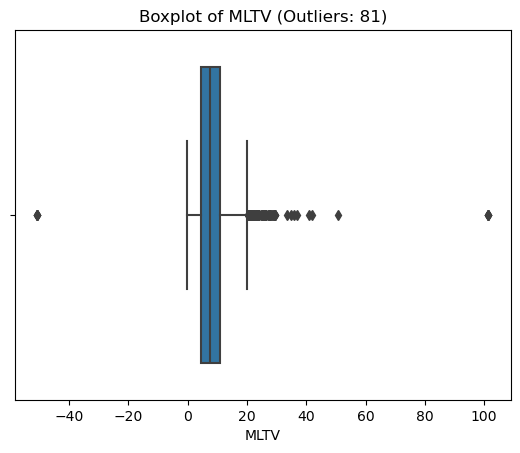

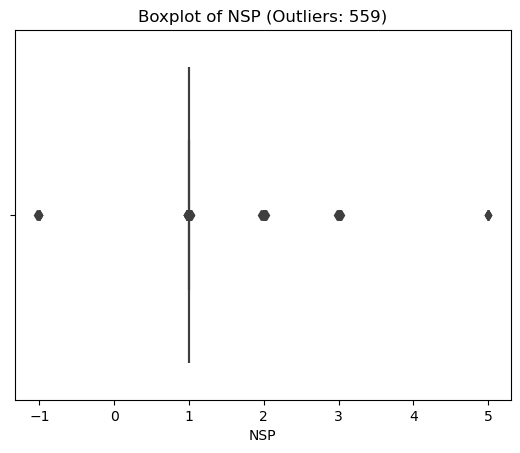

In [6]:
# Plot boxplots for columns with many outliers
for j in columns_with_many_outliers:
  plt.figure()
  sns.boxplot(x=df[j])
  plt.title(f"Boxplot of {j} (Outliers: {outliers_count[j]})")
  plt.show()




In [67]:
############
import numpy as np

# Calculate the lower and upper bound for outliers in each column
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])



In [68]:
# Calculate the number of outliers for each column
outliers_count = {}
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    outliers_count[i] = outliers.shape[0]
    
# Filter columns with more than 30 outliers

columns_with_many_outliers = []
for col, count in outliers_count.items():
    if count >= 30:
        columns_with_many_outliers.append(col)
print(columns_with_many_outliers)



[]


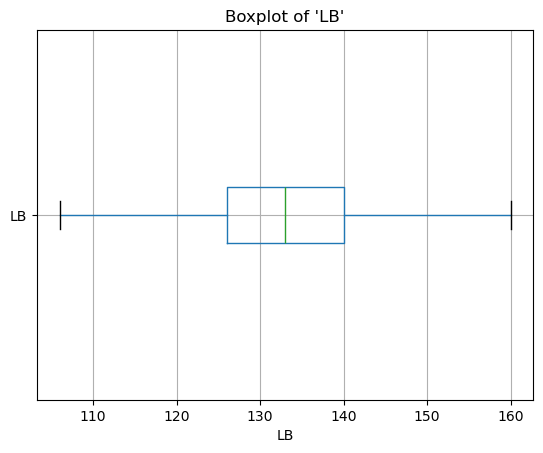

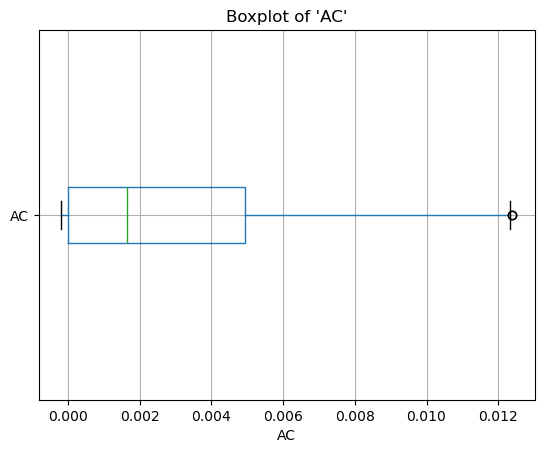

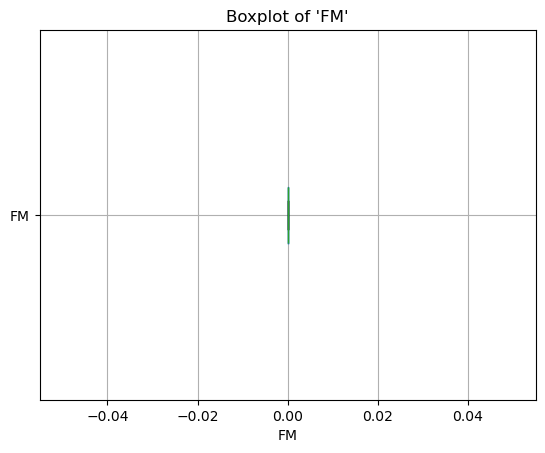

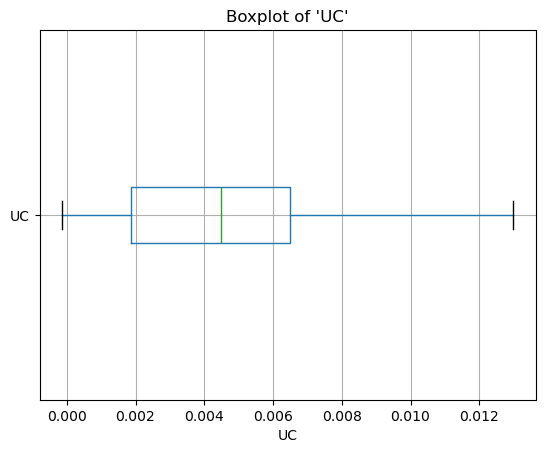

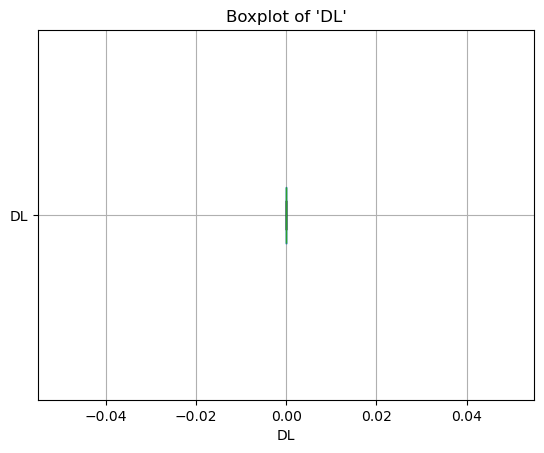

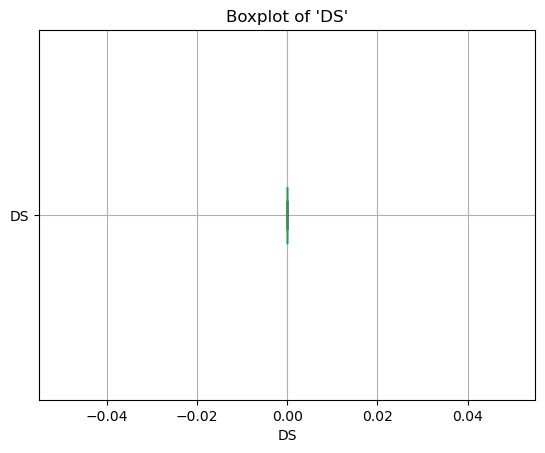

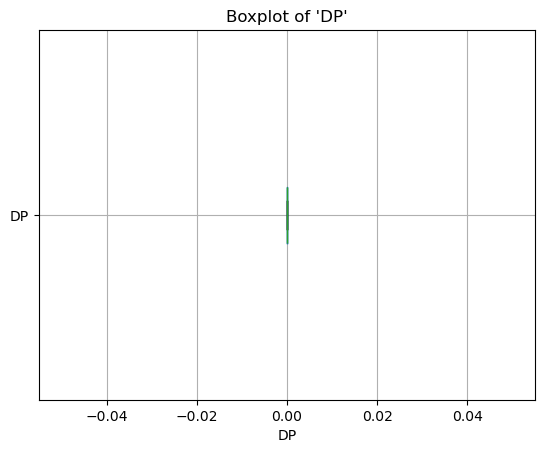

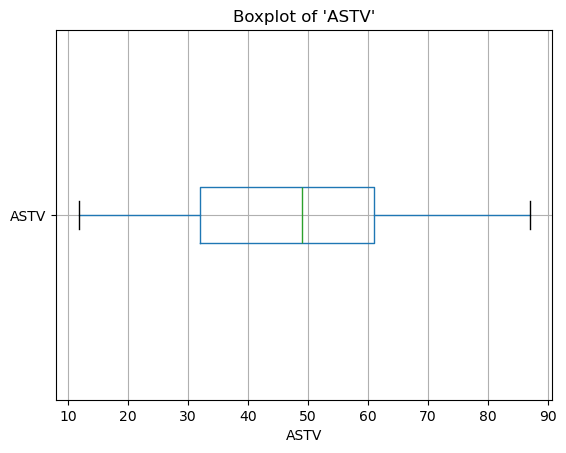

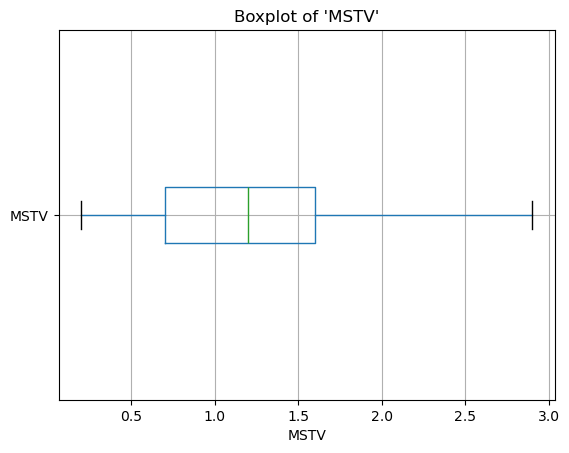

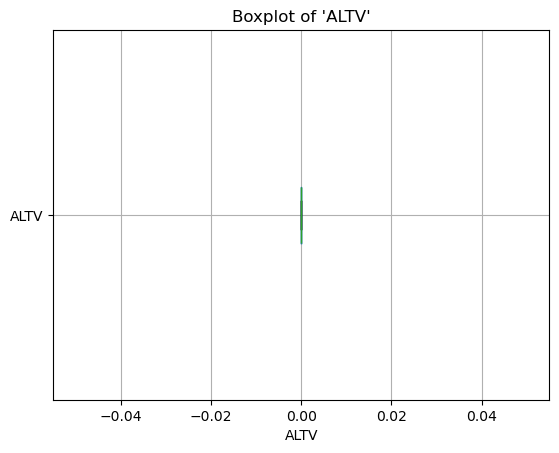

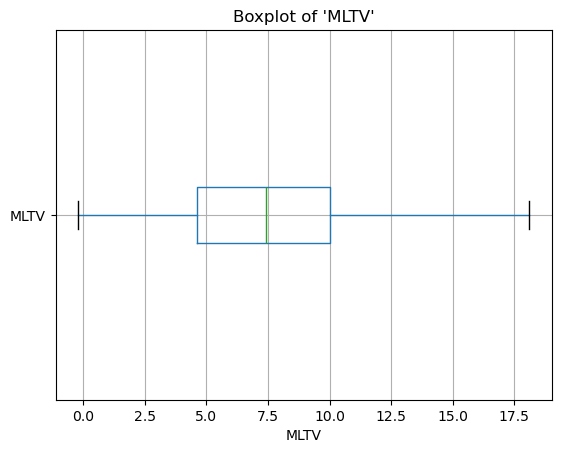

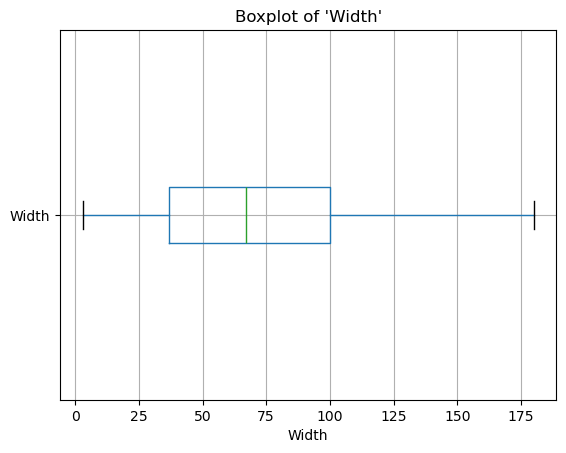

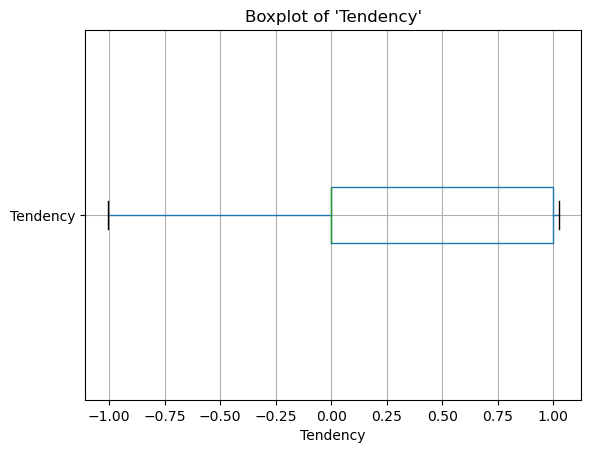

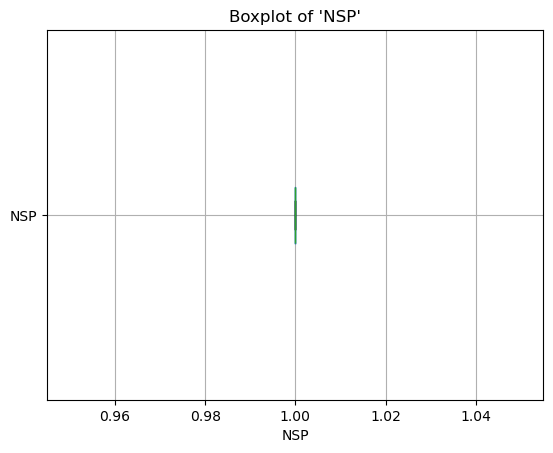

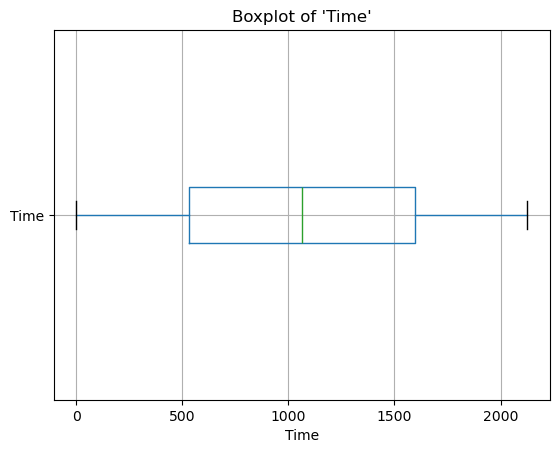

In [69]:
#### boxplot of all columns
import seaborn as sns
import matplotlib.pyplot as plt
for i in df:
    plt.figure()
    df.boxplot(i,vert=False)
    plt.title(f"Boxplot of '{i}'")
    plt.xlabel(i)
    plt.show()

In [10]:
######## So, now by seeing the new boxplots we can understand that there are no more outliers and our dataset is now outlier free 
####### and we can use it.

In [11]:
############### 2. Statistical Summary #####################
for column in df:
    print(f"Descriptive statistics for column {column}:")
    print(df[column].describe())
    print()


Descriptive statistics for column LB:
count    2105.000000
mean      133.266624
std         9.791949
min       106.000000
25%       126.000000
50%       133.000000
75%       140.000000
max       160.000000
Name: LB, dtype: float64

Descriptive statistics for column AC:
count    2106.000000
mean        0.002954
std         0.003537
min        -0.000185
25%         0.000000
50%         0.001634
75%         0.005179
max         0.014068
Name: AC, dtype: float64

Descriptive statistics for column FM:
count    2126.000000
mean        0.000554
std         0.001300
min        -0.003435
25%         0.000000
50%         0.000000
75%         0.000000
max         0.006272
Name: FM, dtype: float64

Descriptive statistics for column UC:
count    2126.000000
mean        0.004341
std         0.002911
min        -0.000132
25%         0.001880
50%         0.004484
75%         0.006504
max         0.012987
Name: UC, dtype: float64

Descriptive statistics for column DL:
count    2126.000000
mean        0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


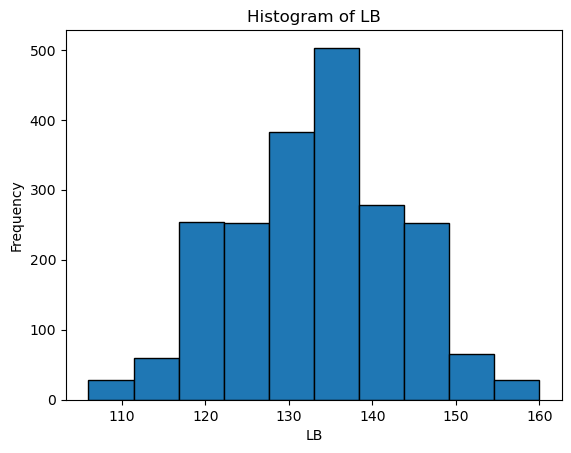

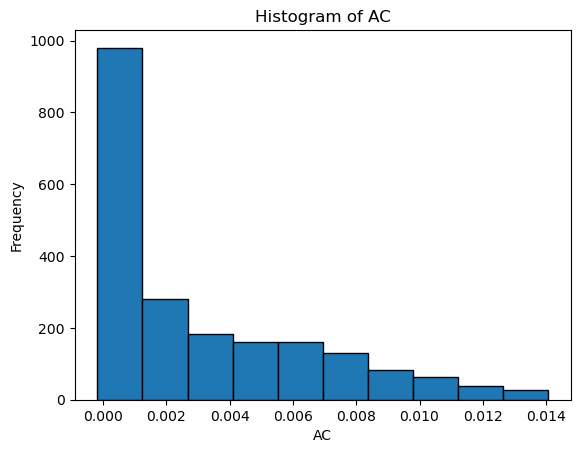

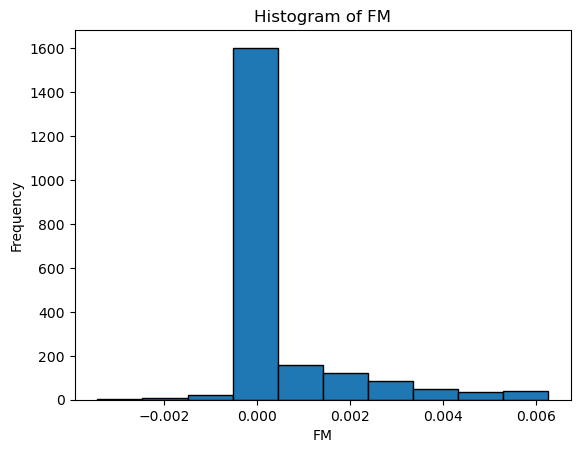

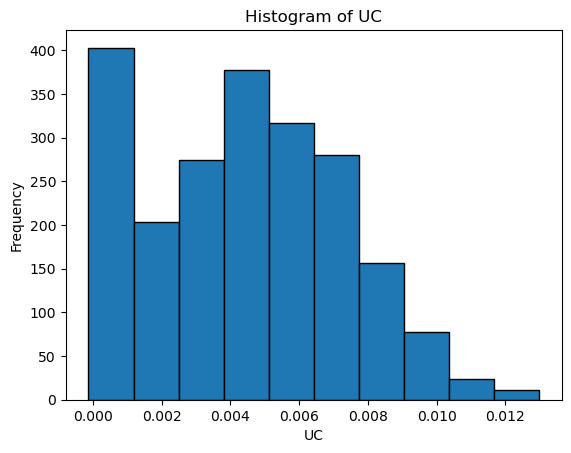

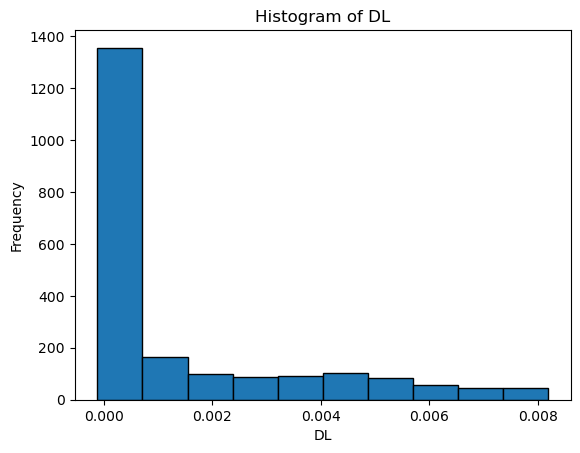

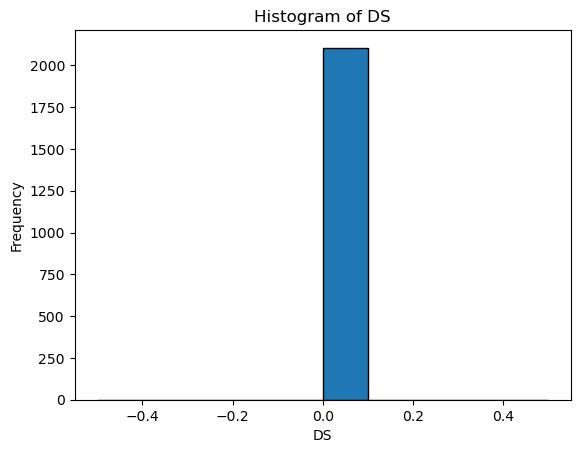

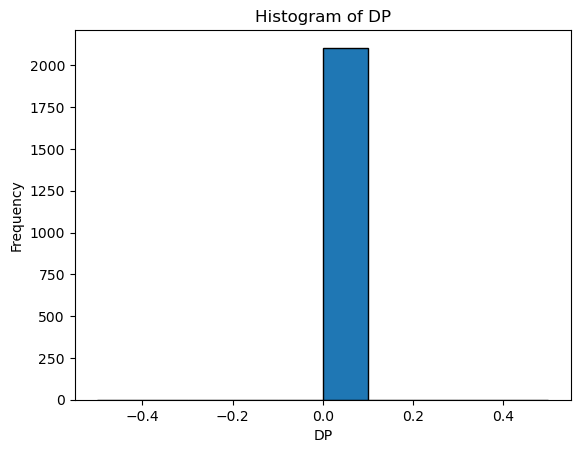

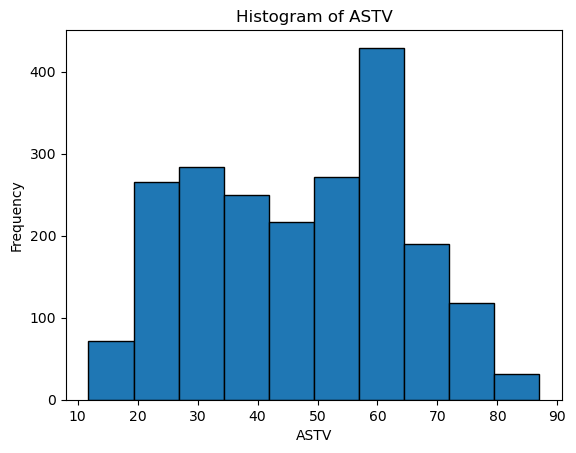

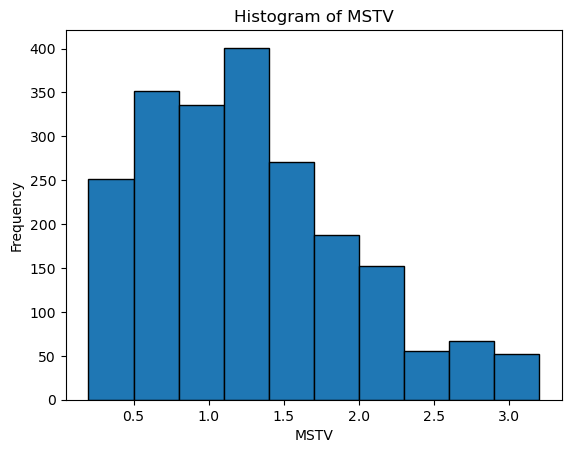

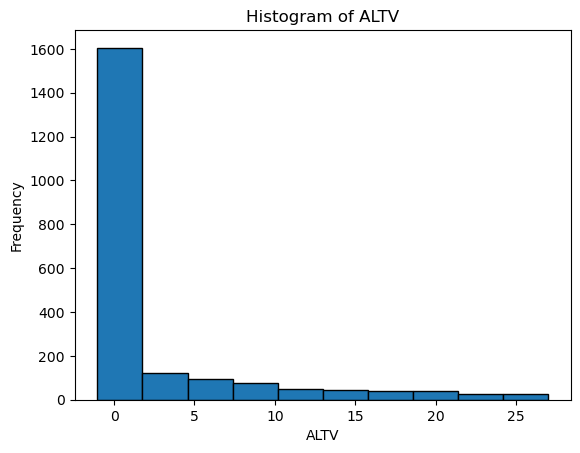

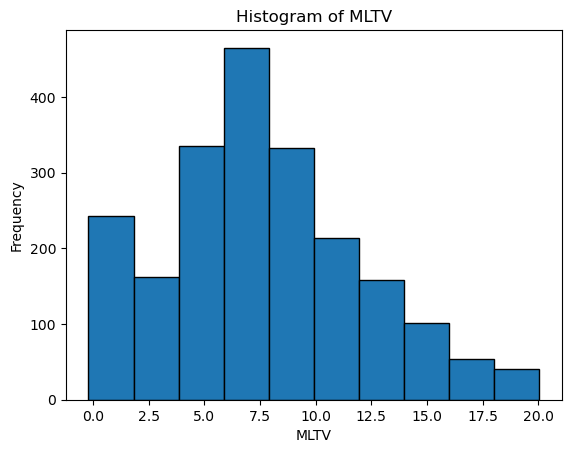

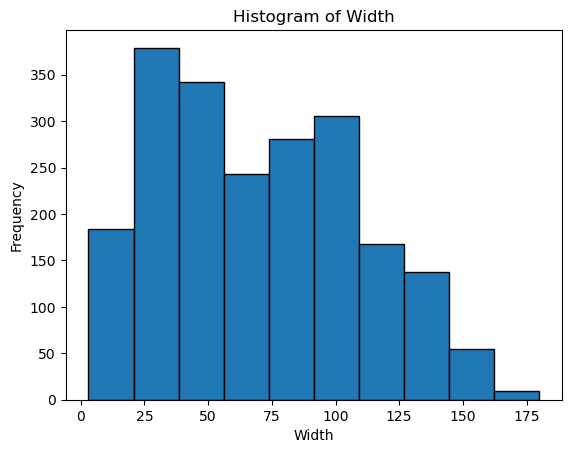

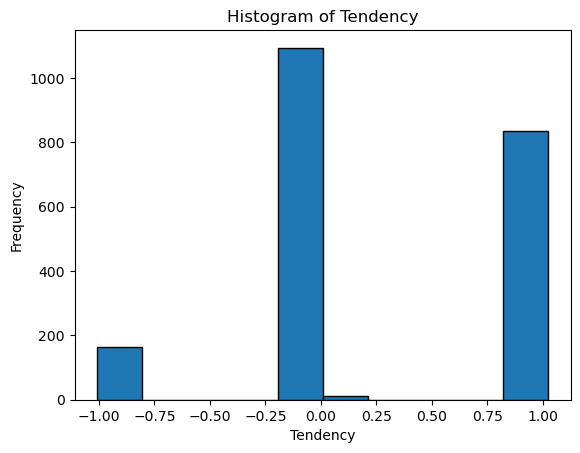

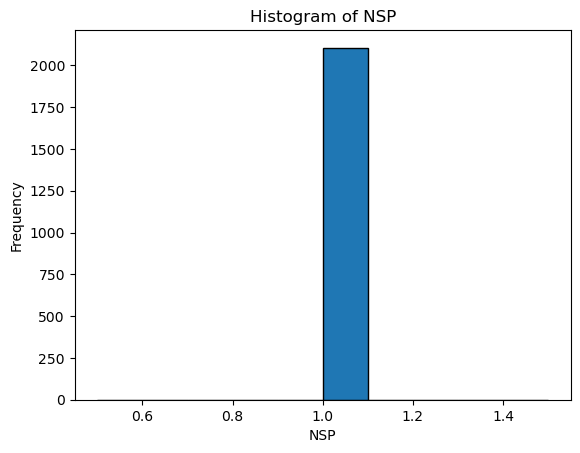

In [13]:
############# histogram to visualize the distributions of various numerical variables. ################
import matplotlib.pyplot as plt
for column in df:
    plt.figure()
    plt.hist(df[column],edgecolor='black')  # You can adjust the number of bins
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

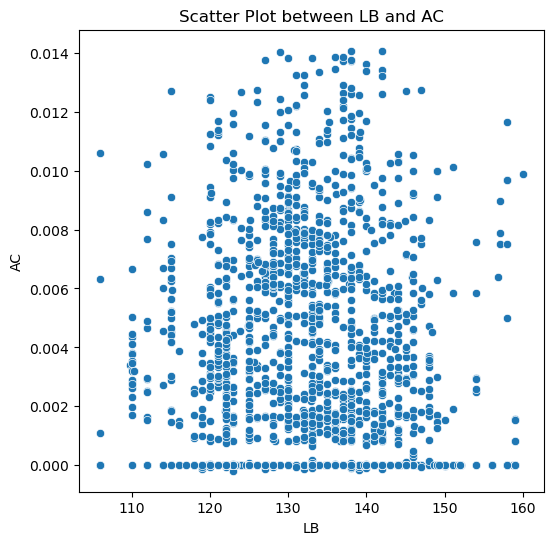

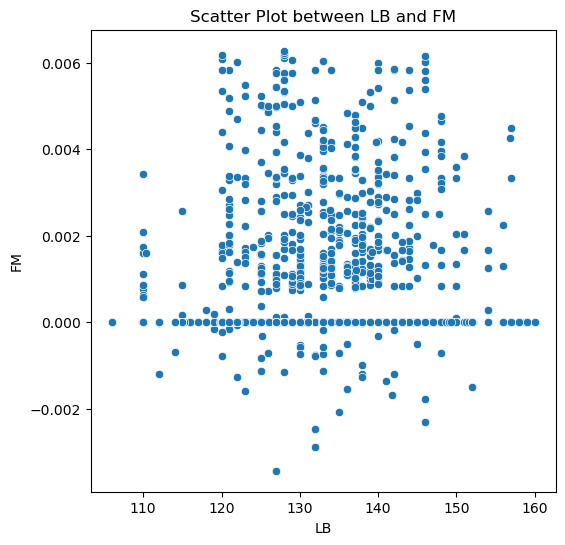

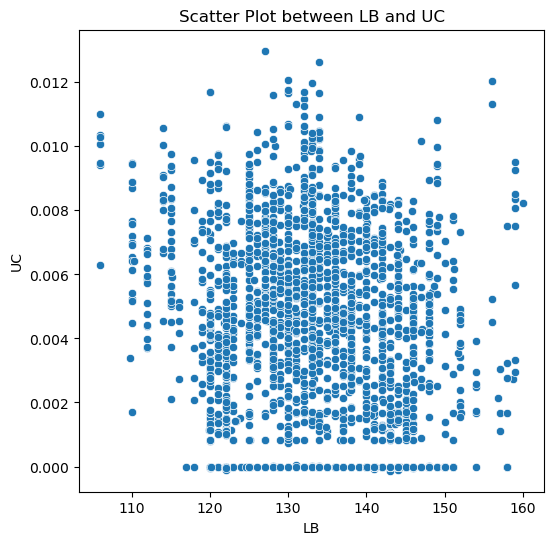

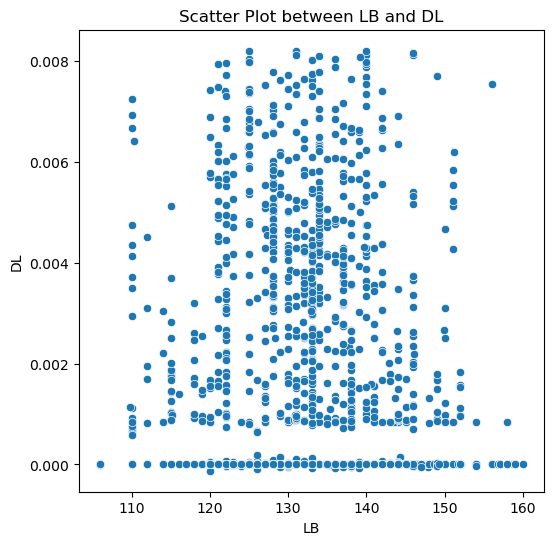

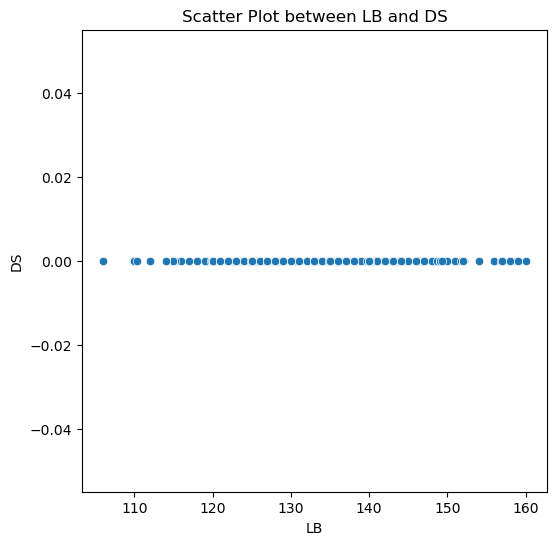

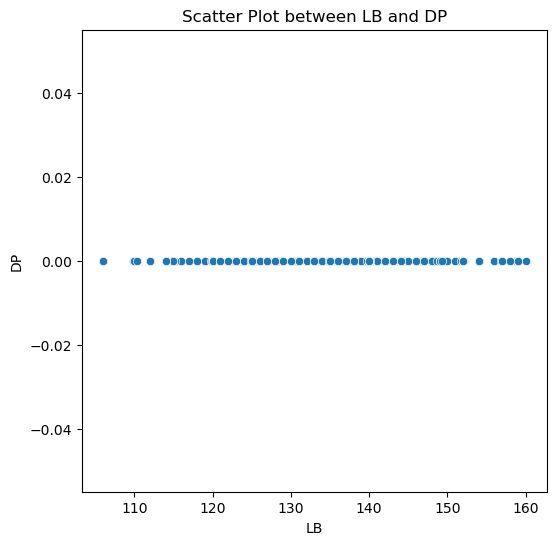

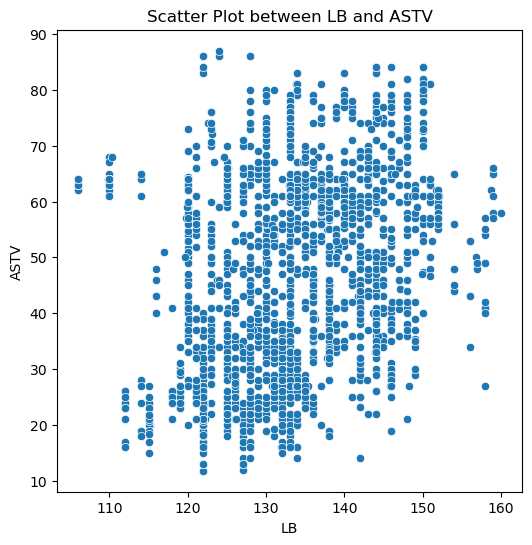

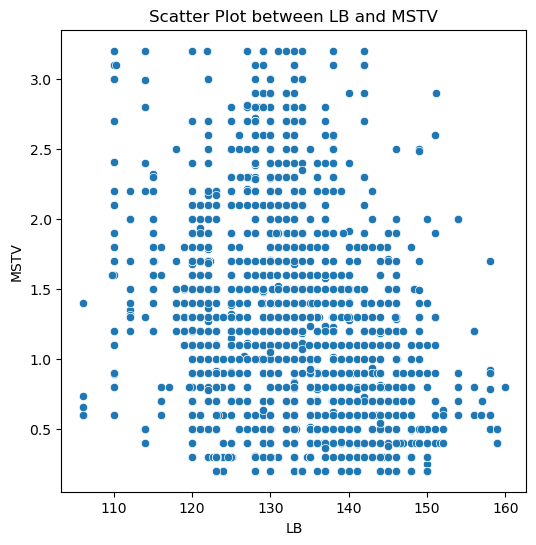

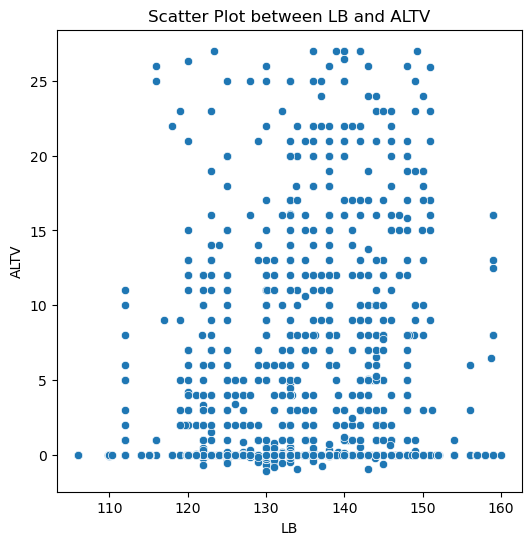

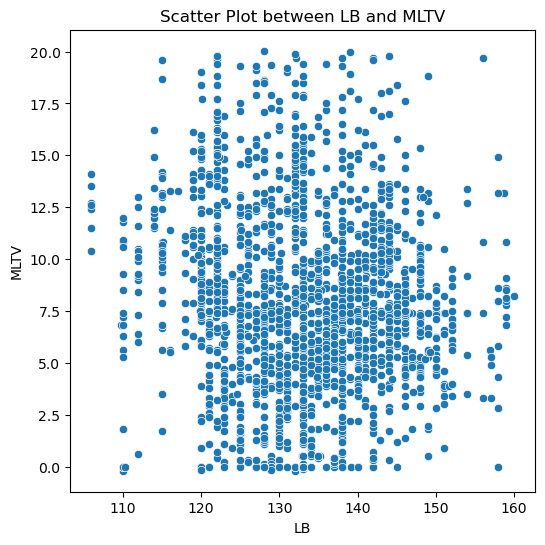

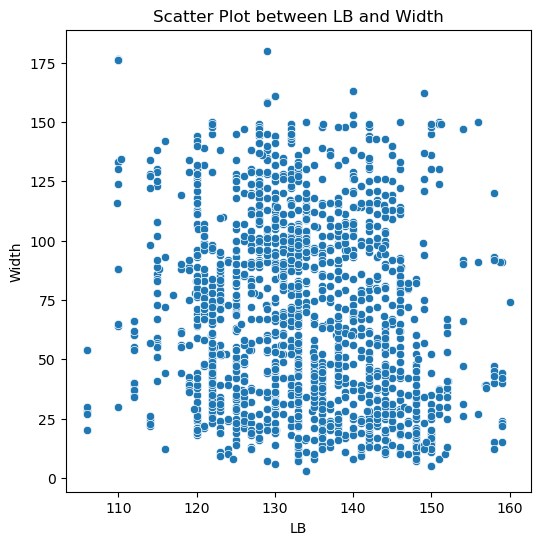

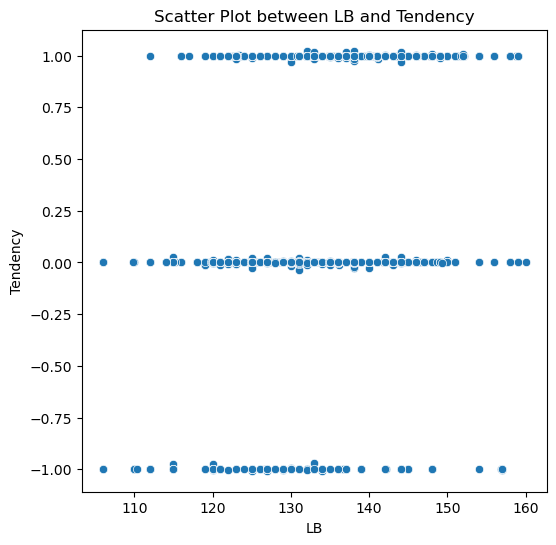

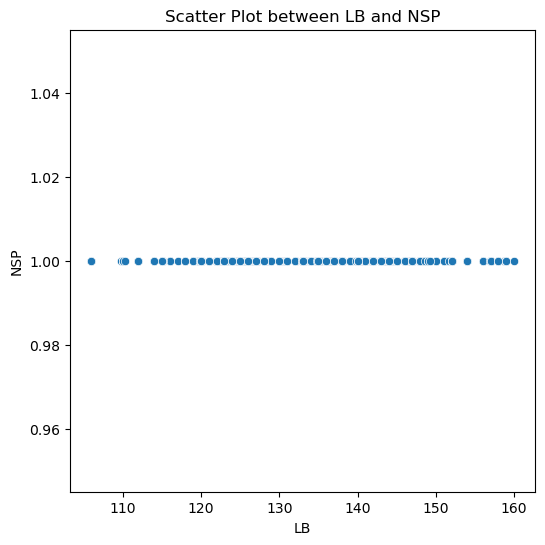

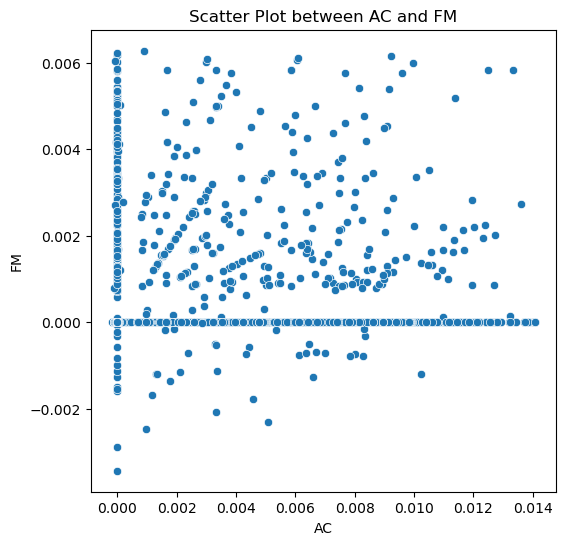

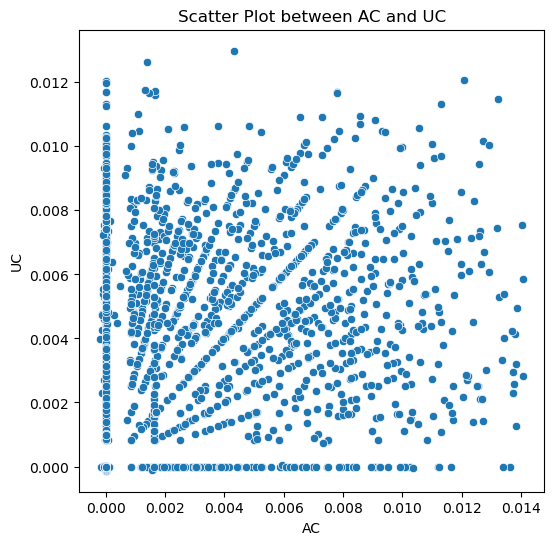

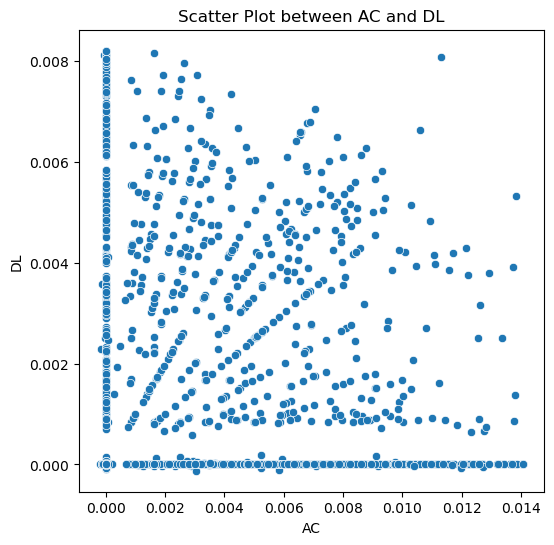

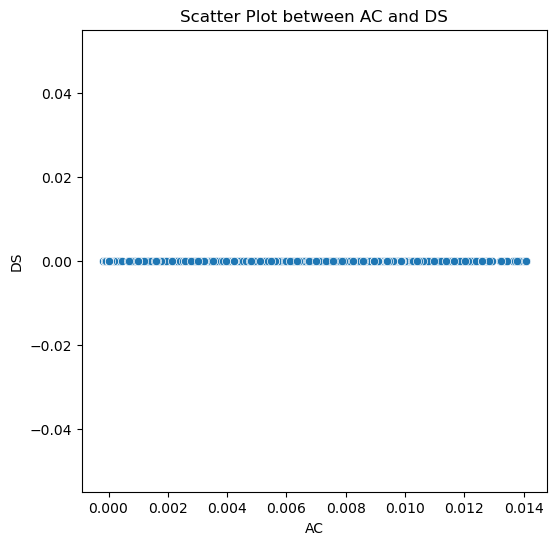

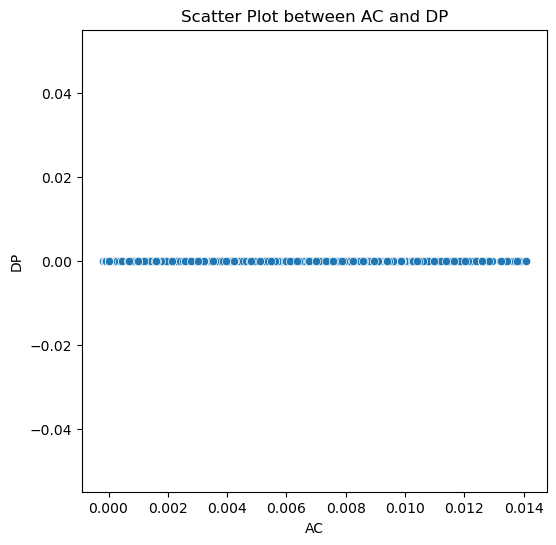

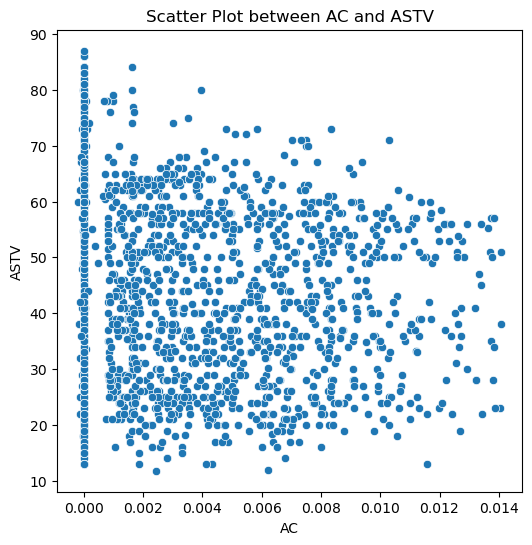

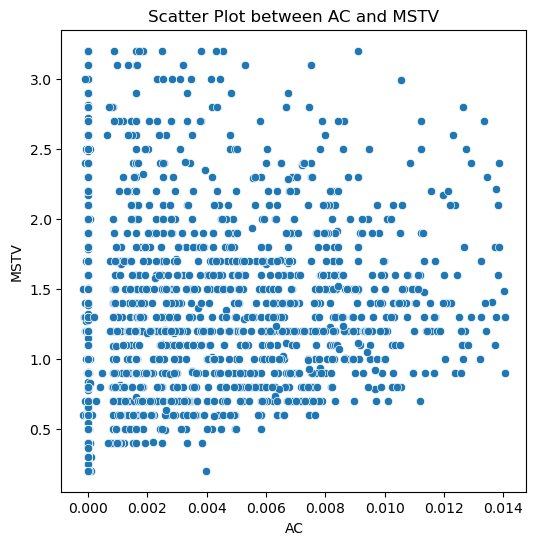

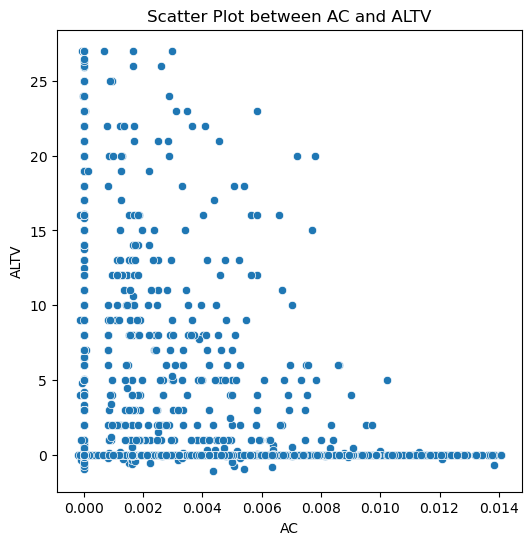

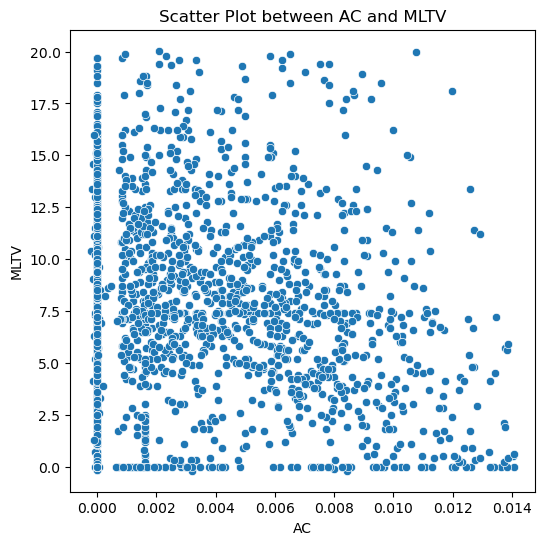

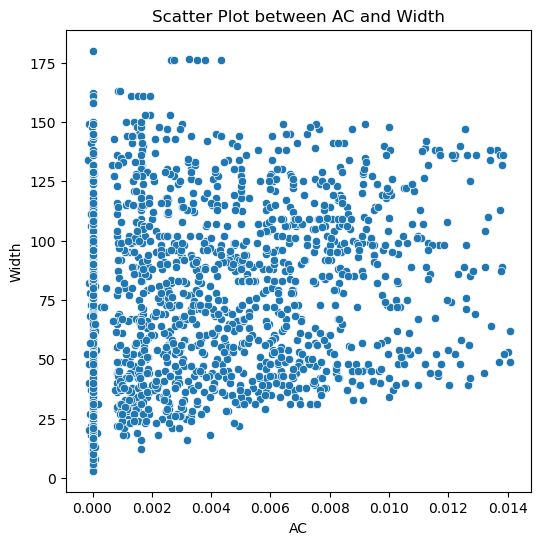

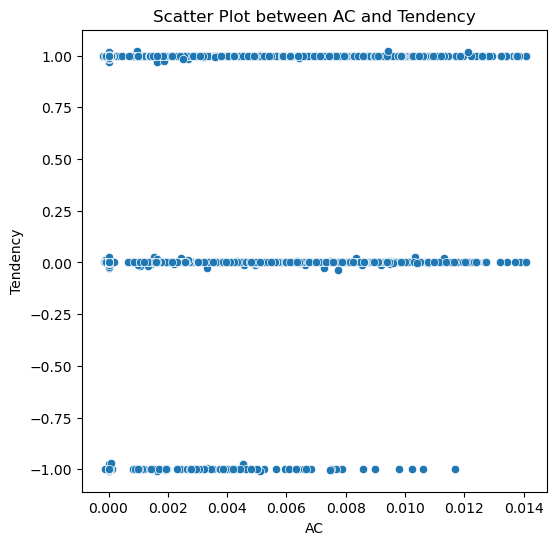

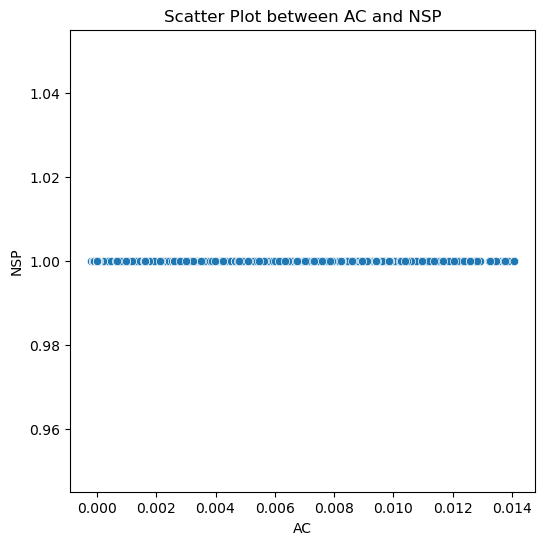

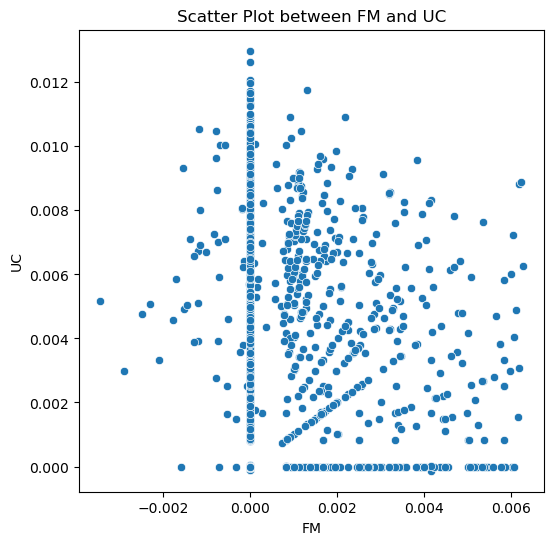

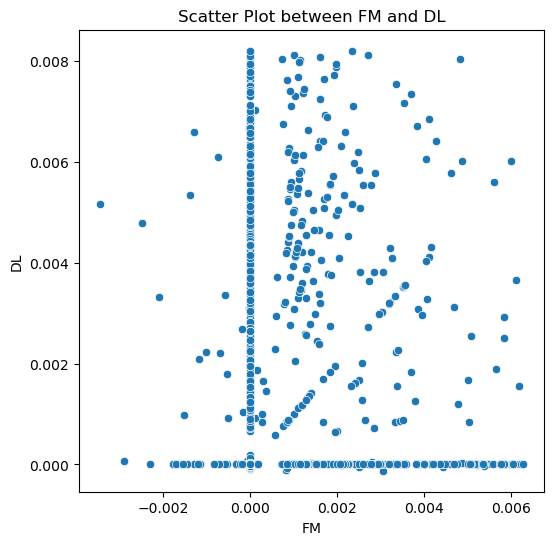

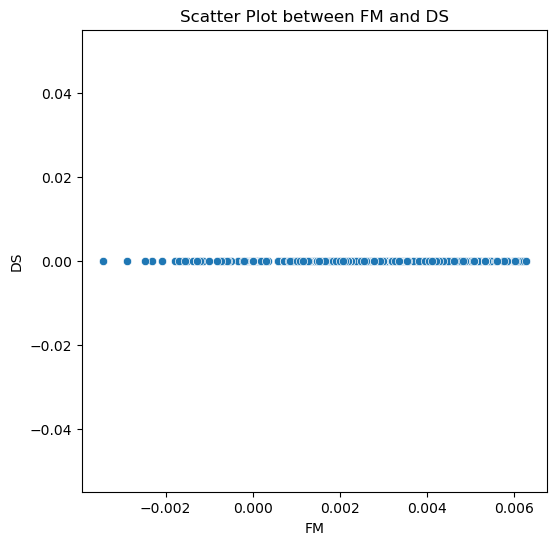

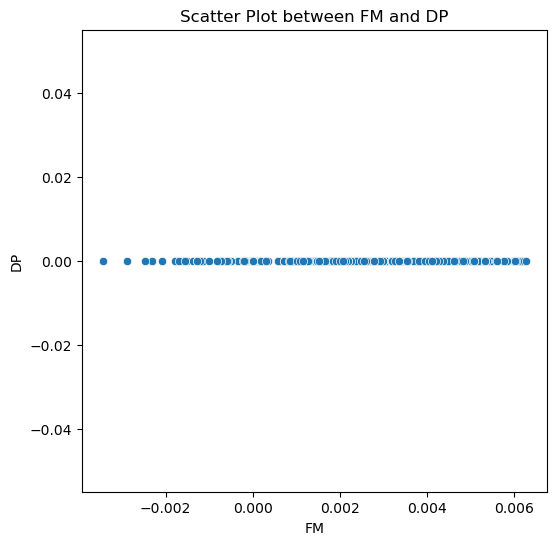

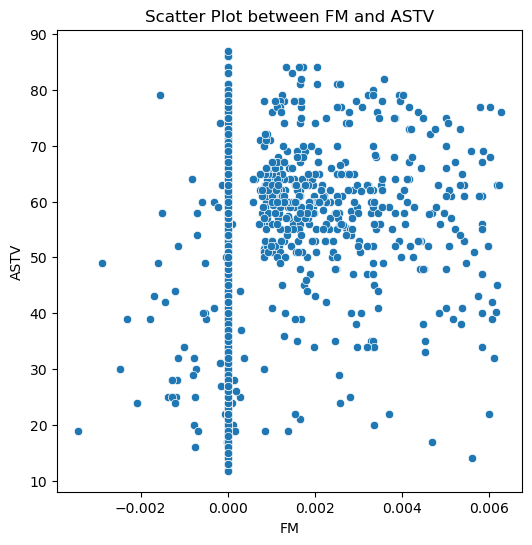

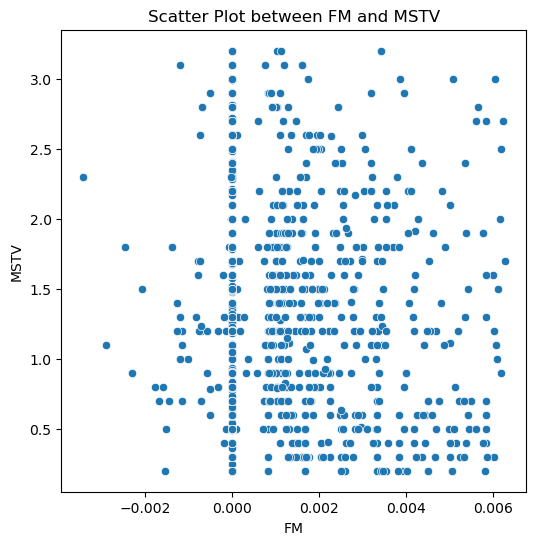

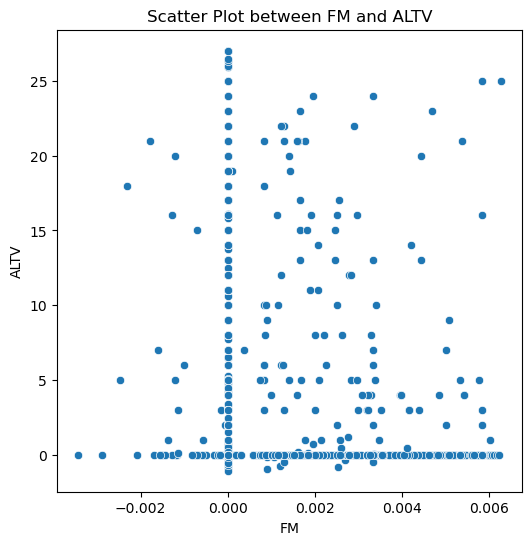

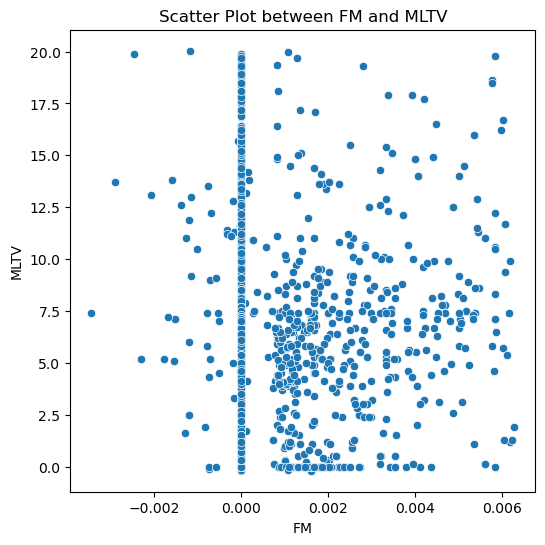

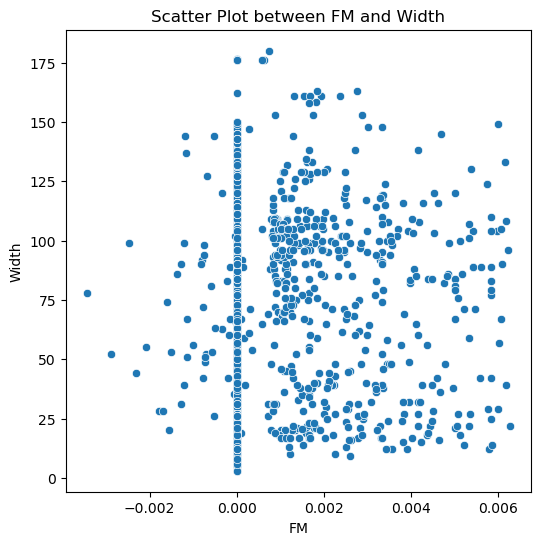

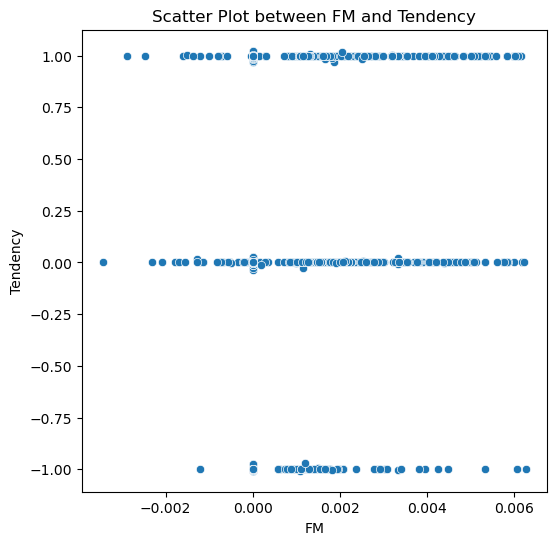

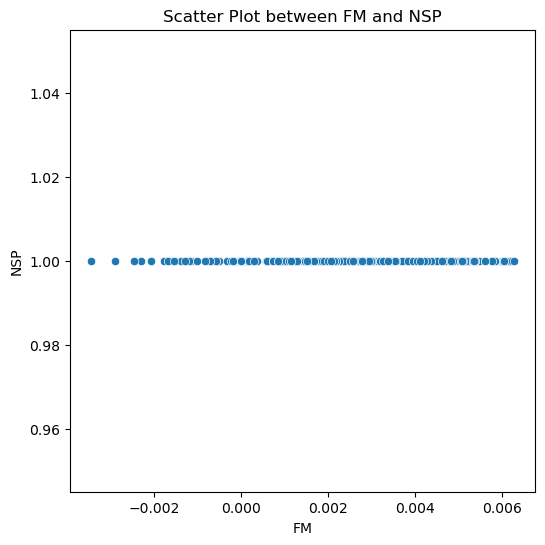

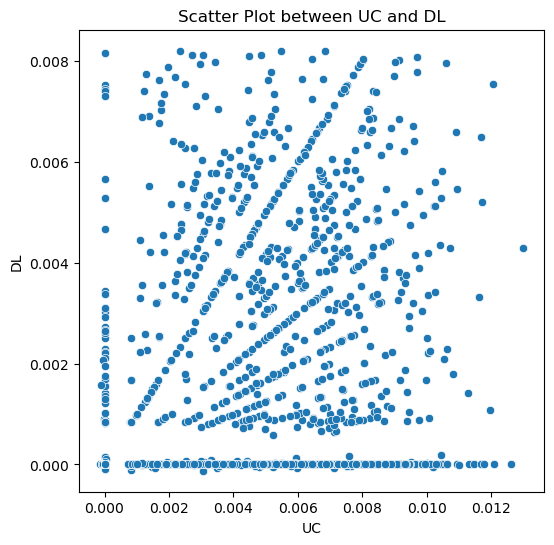

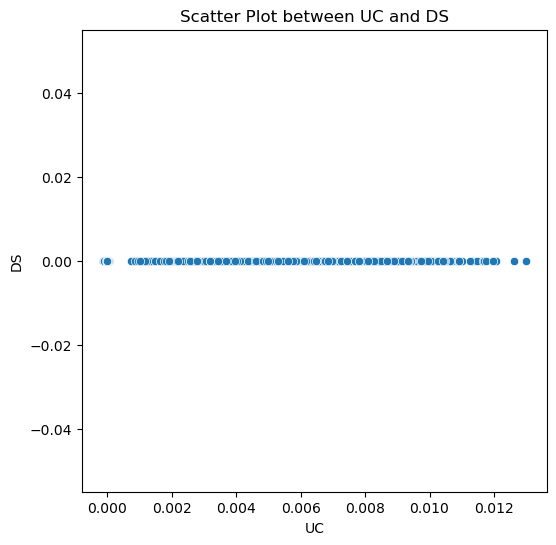

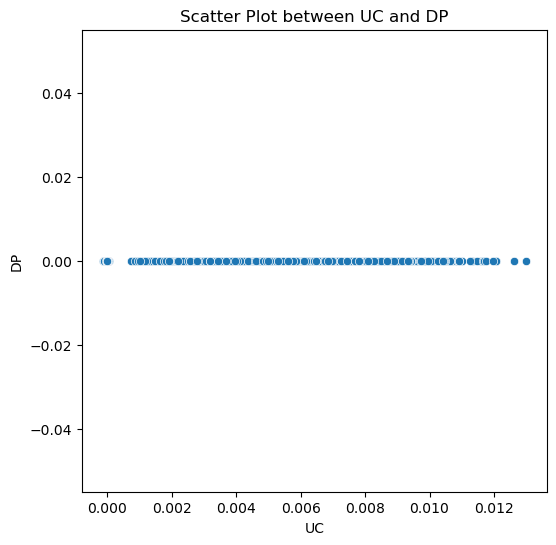

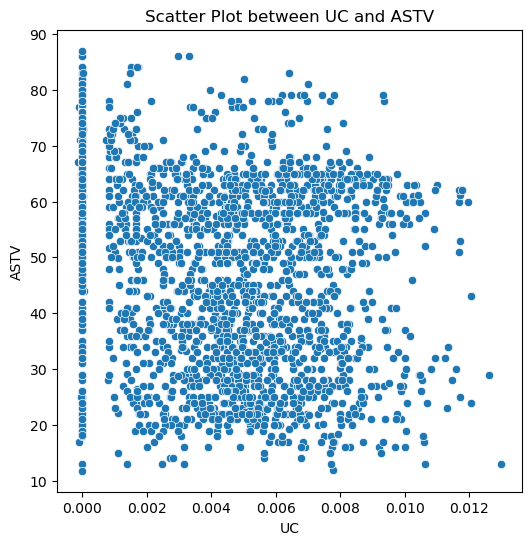

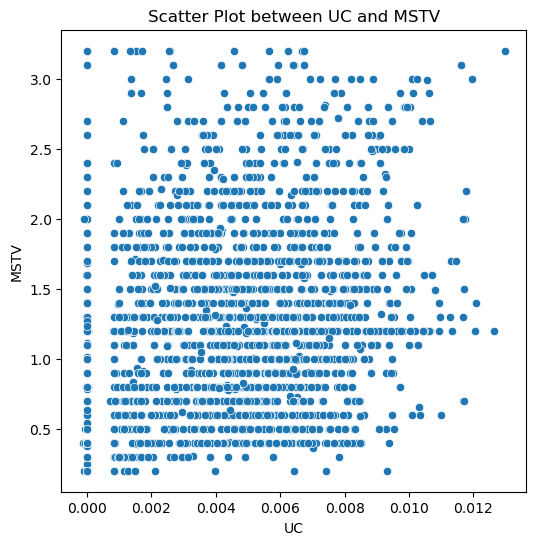

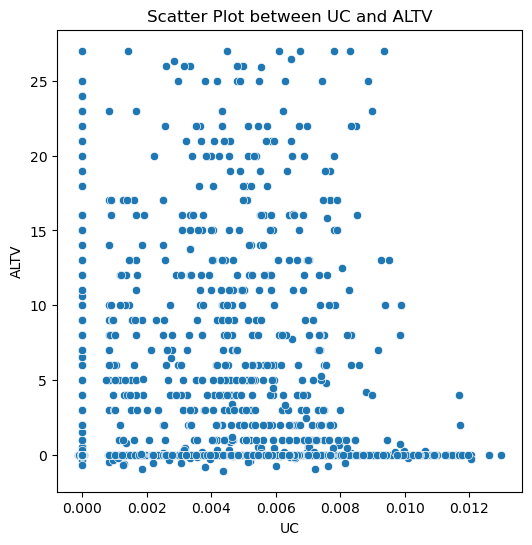

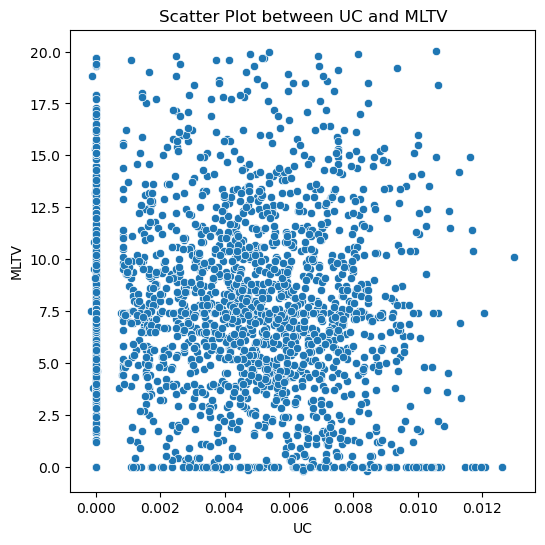

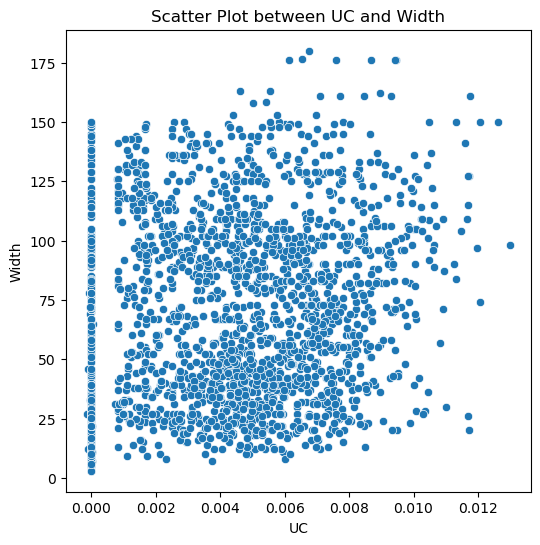

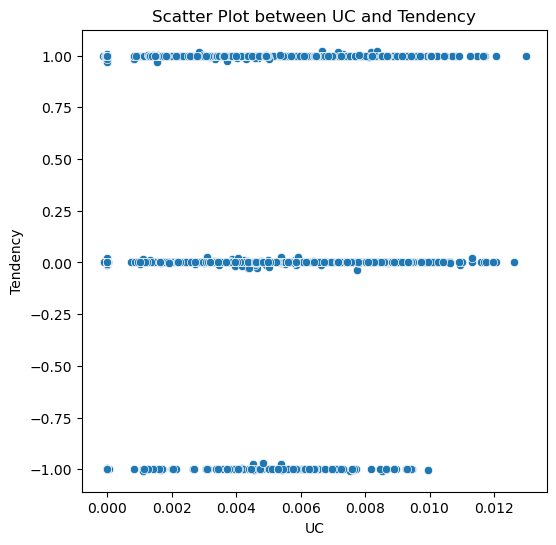

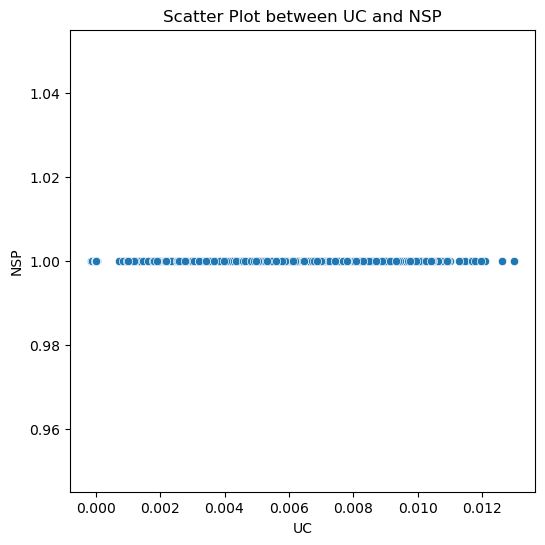

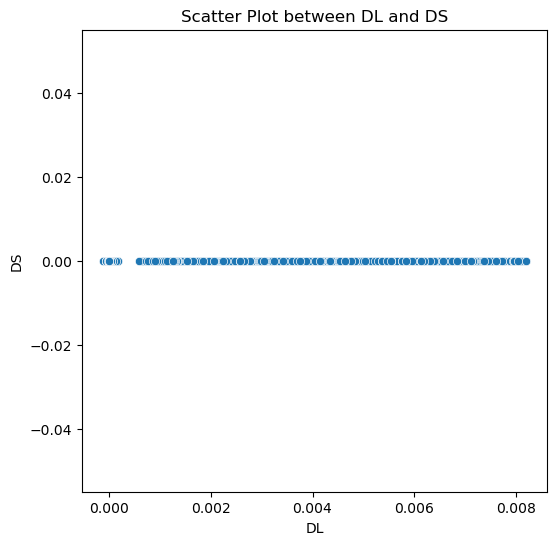

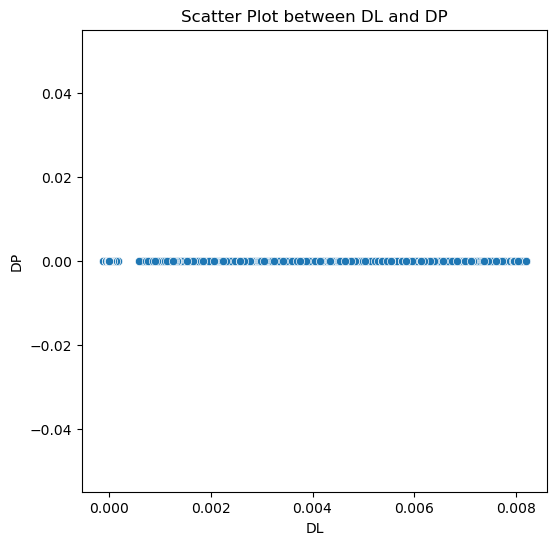

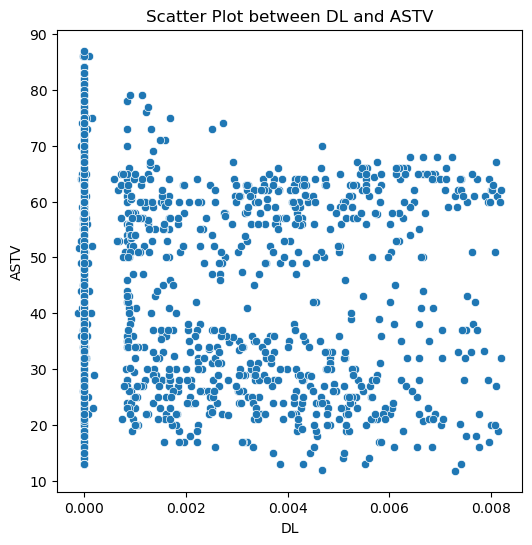

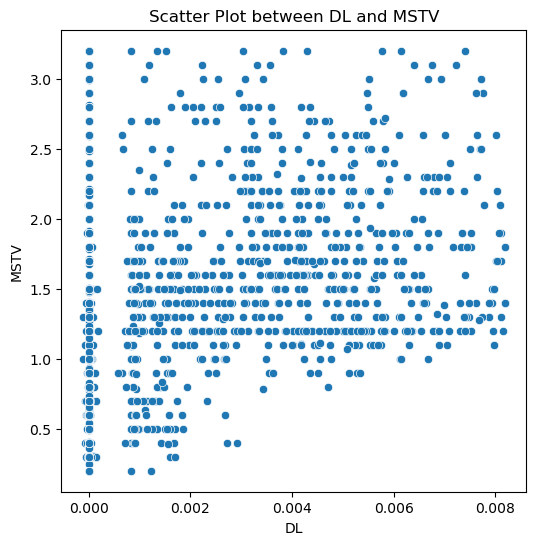

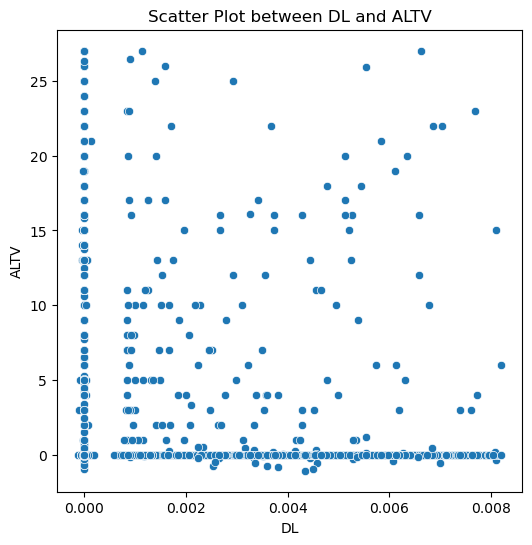

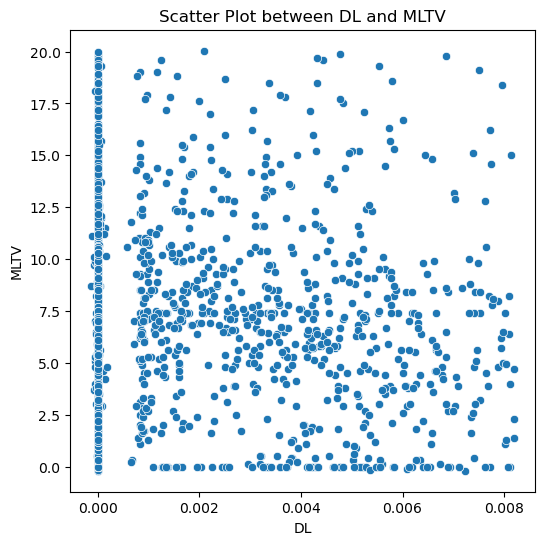

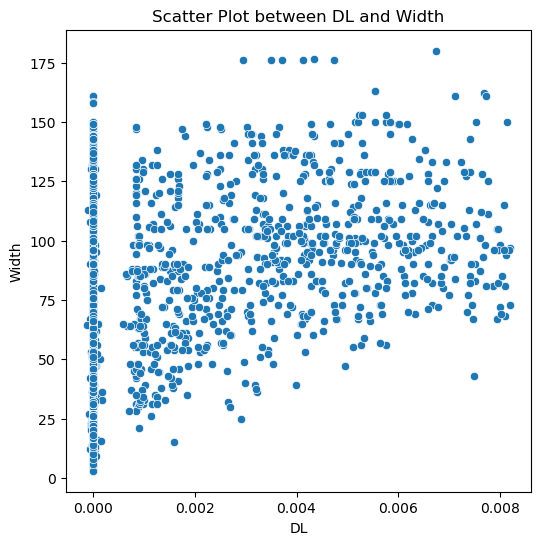

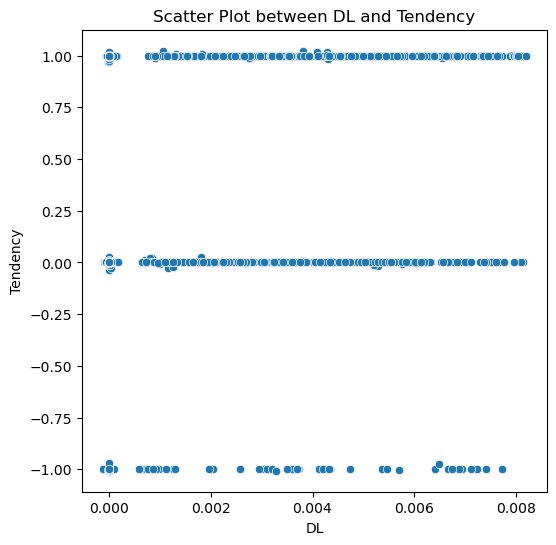

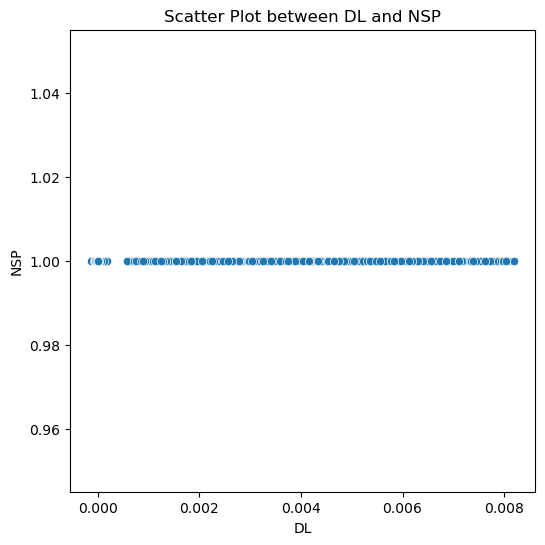

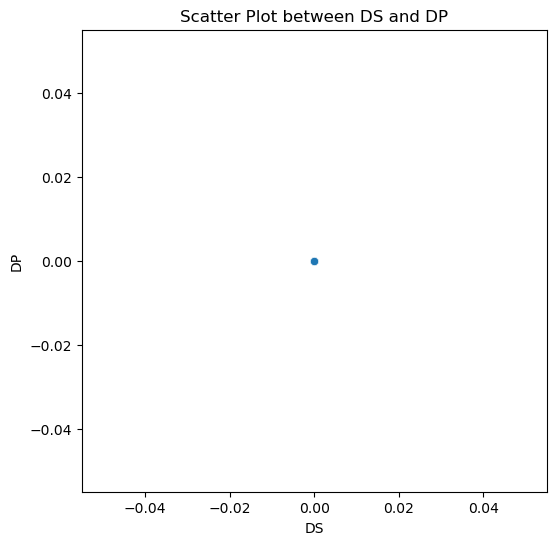

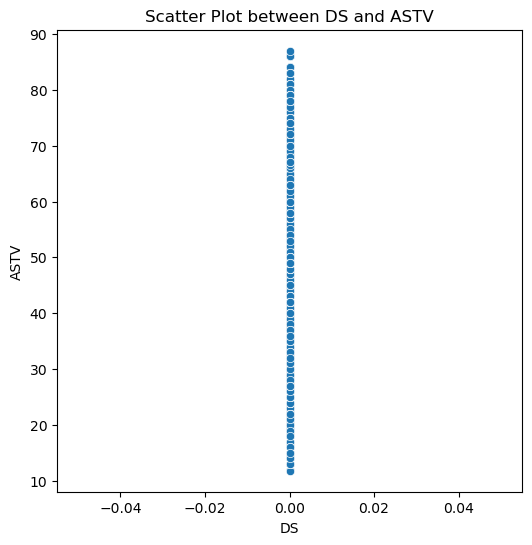

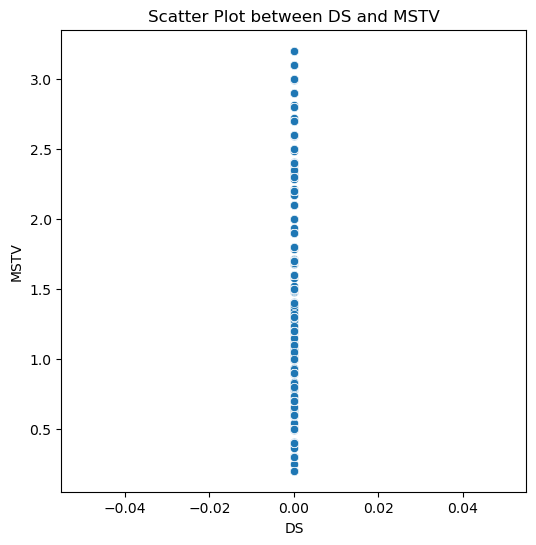

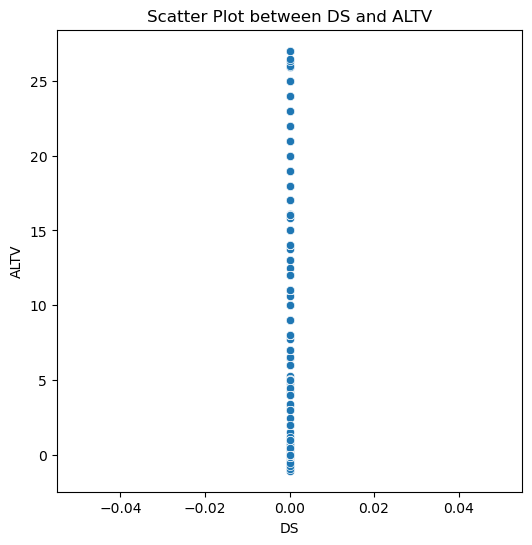

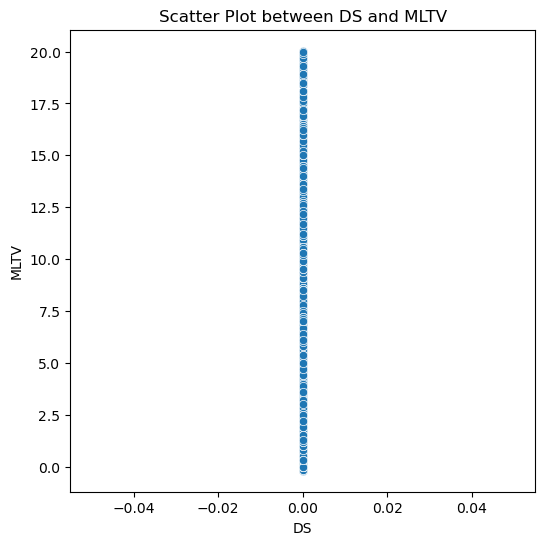

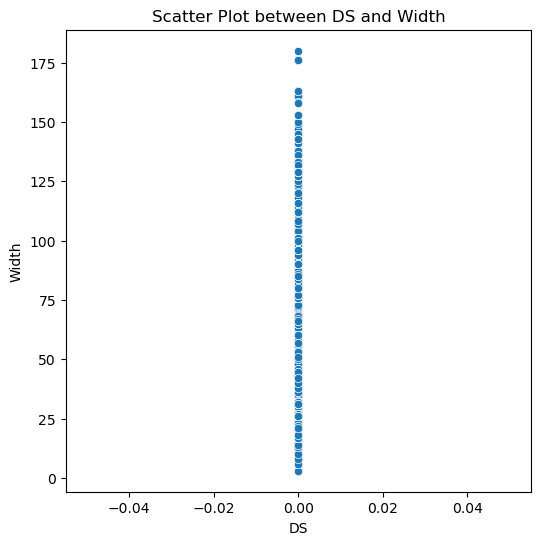

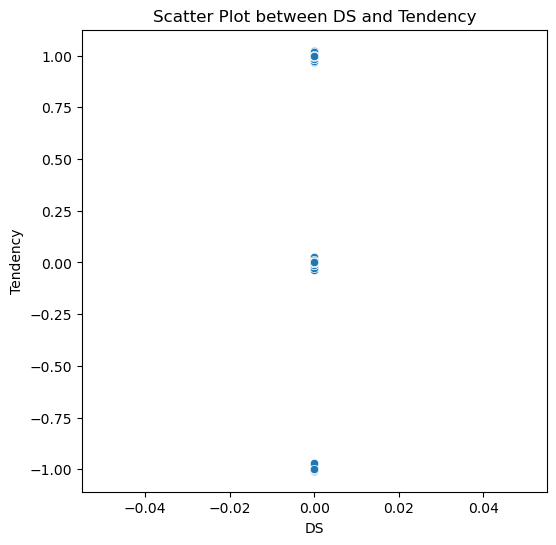

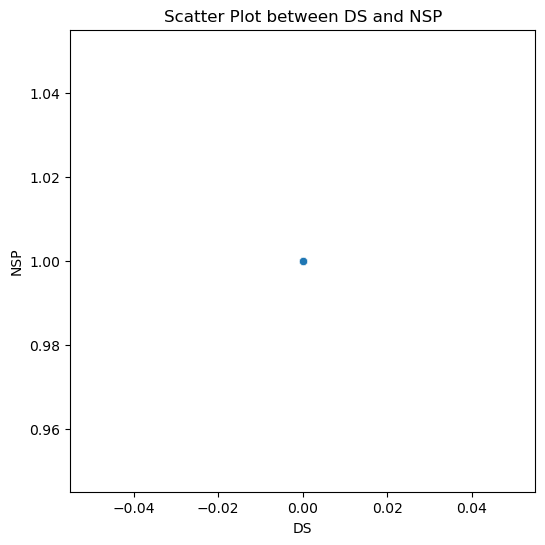

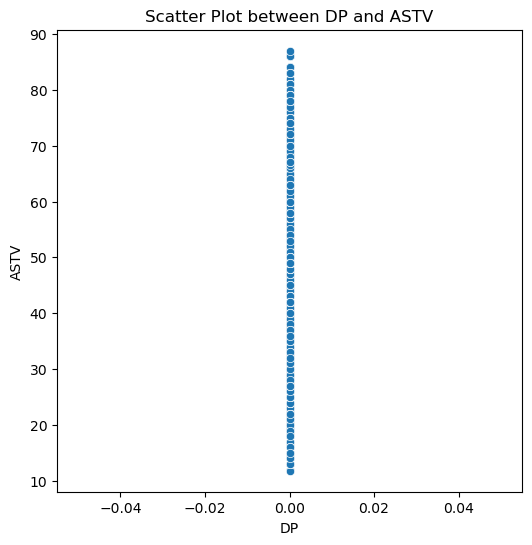

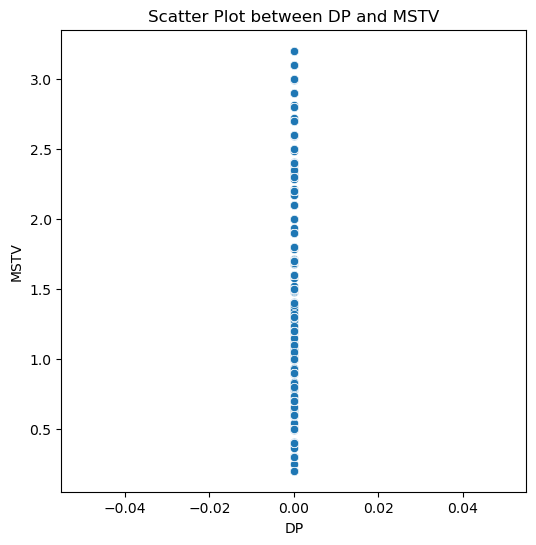

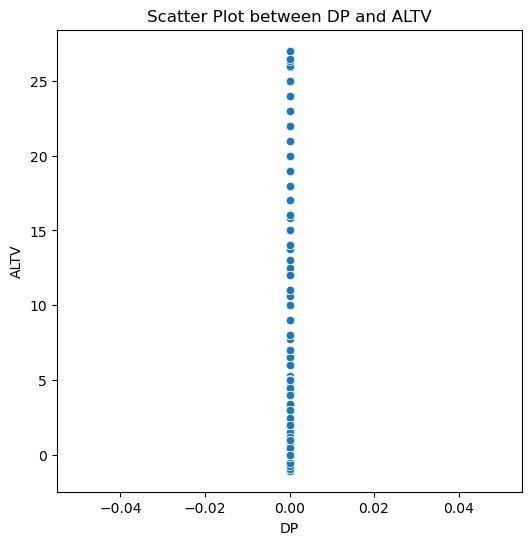

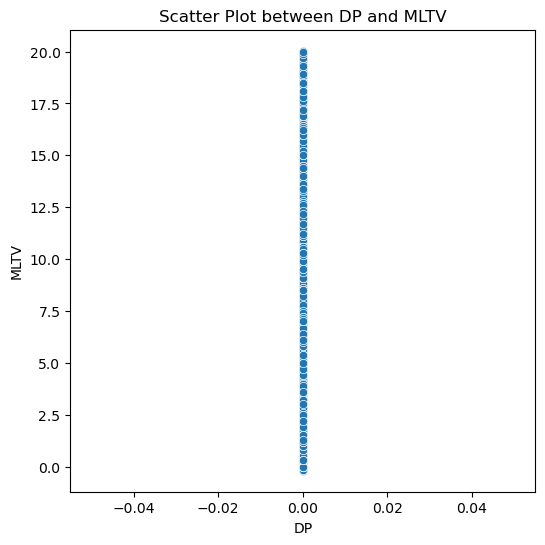

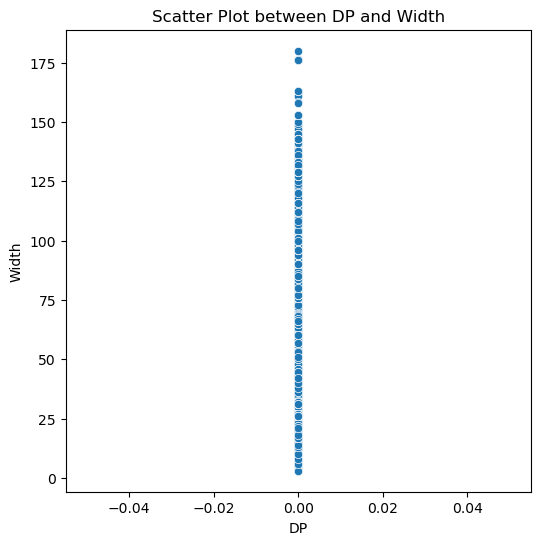

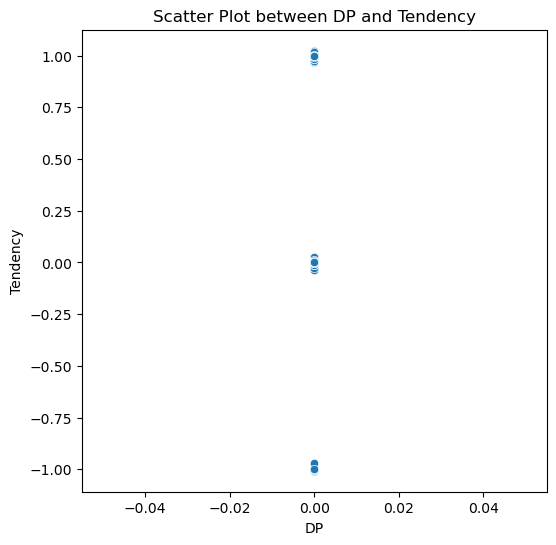

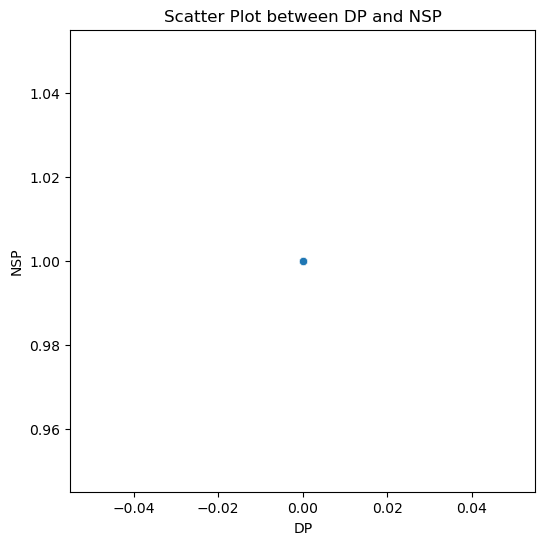

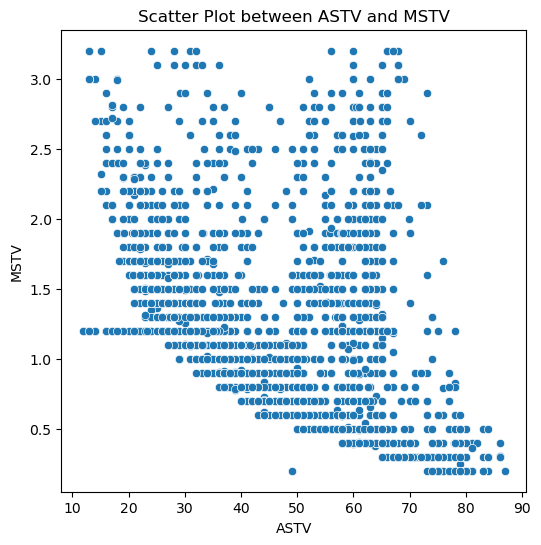

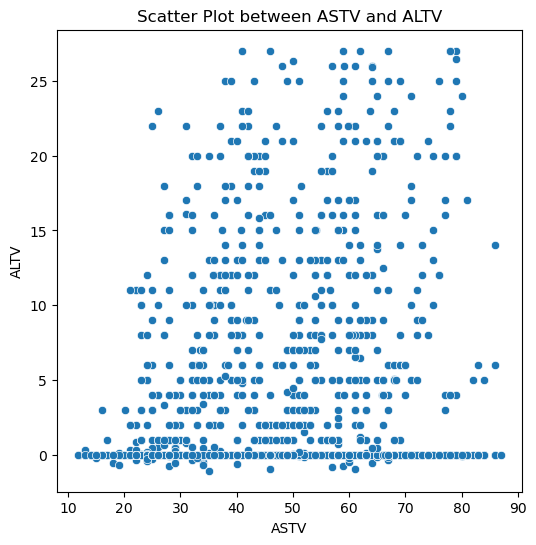

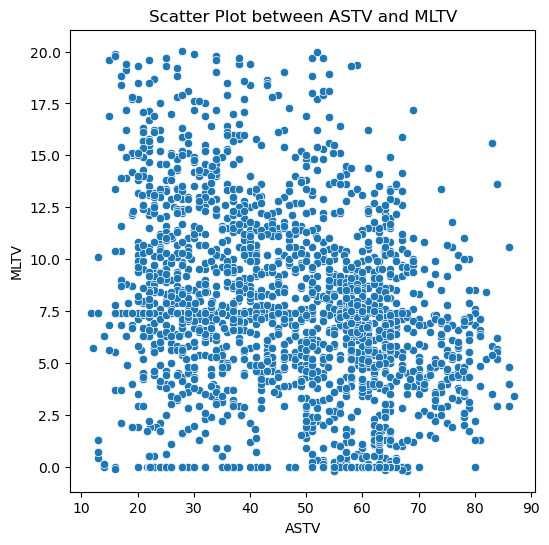

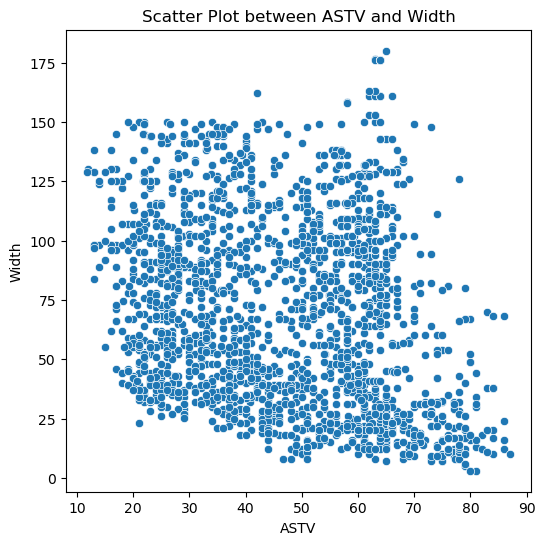

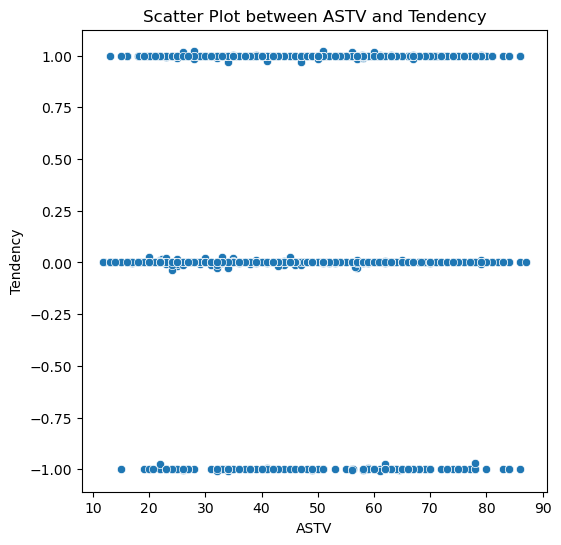

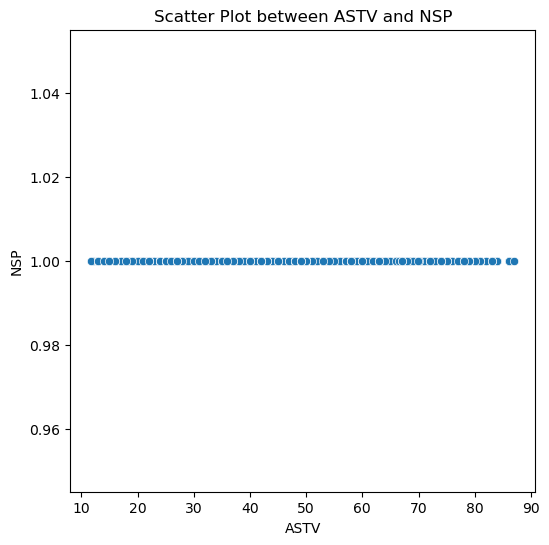

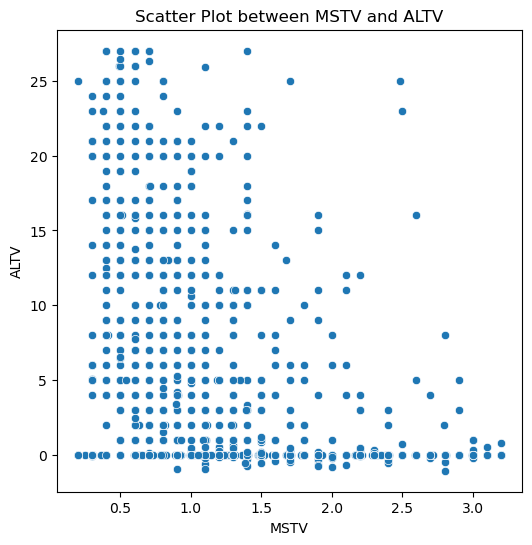

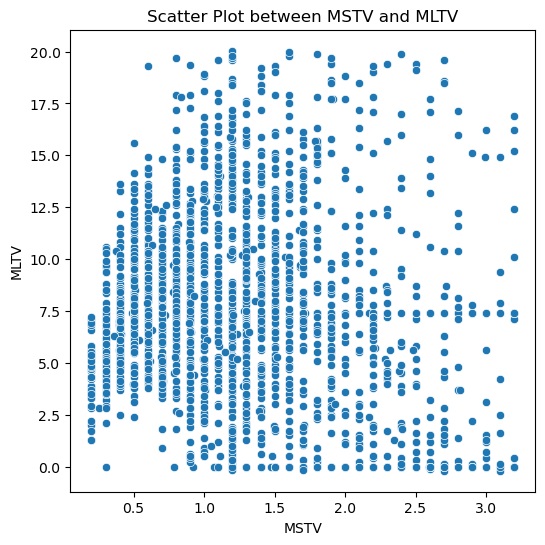

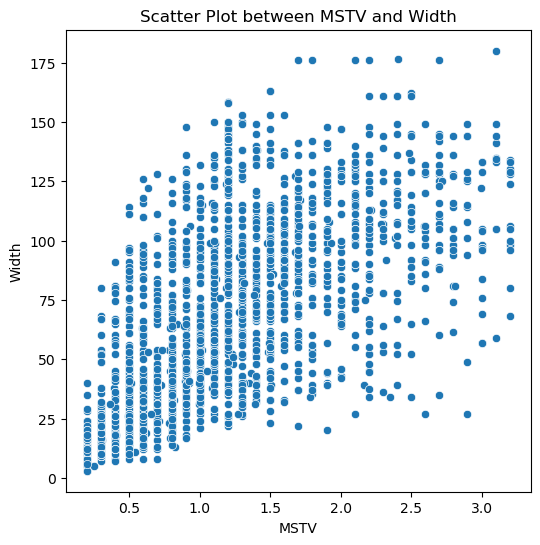

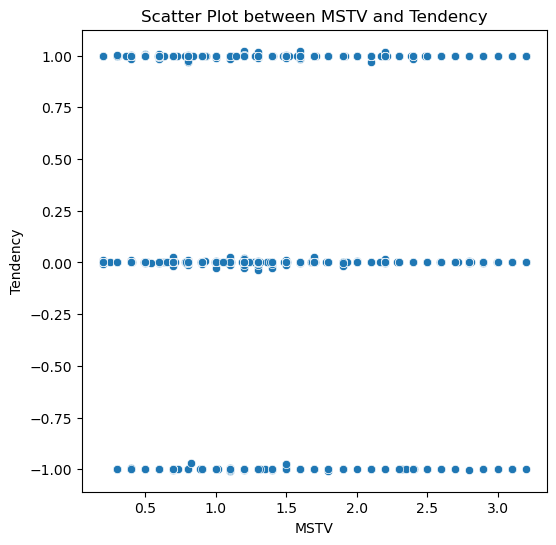

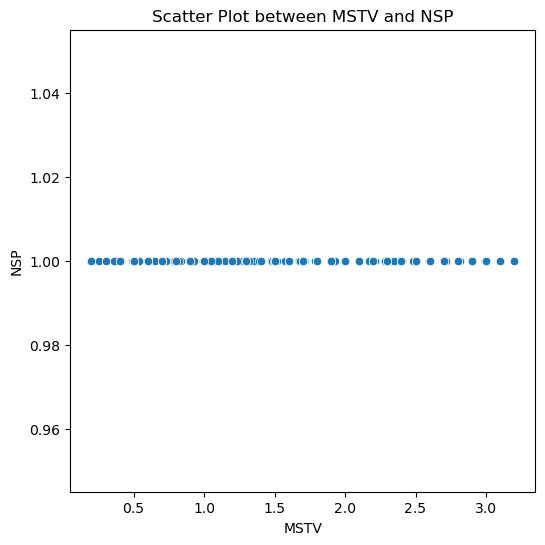

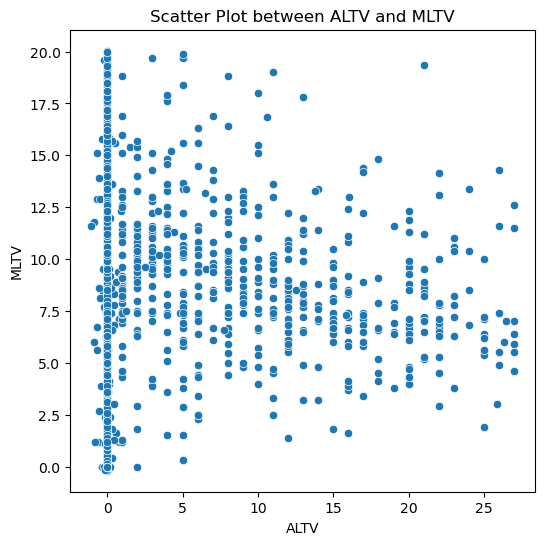

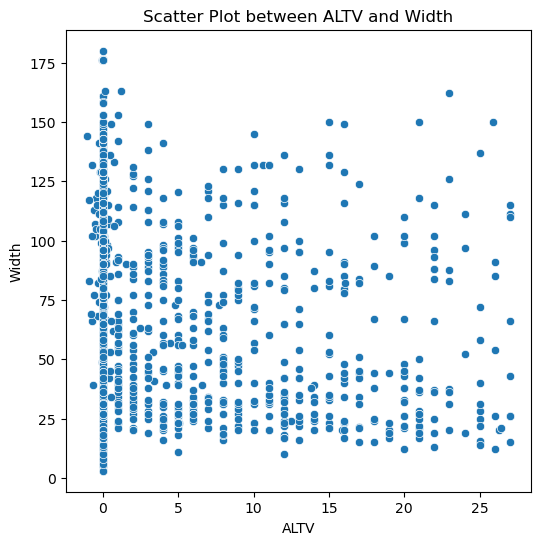

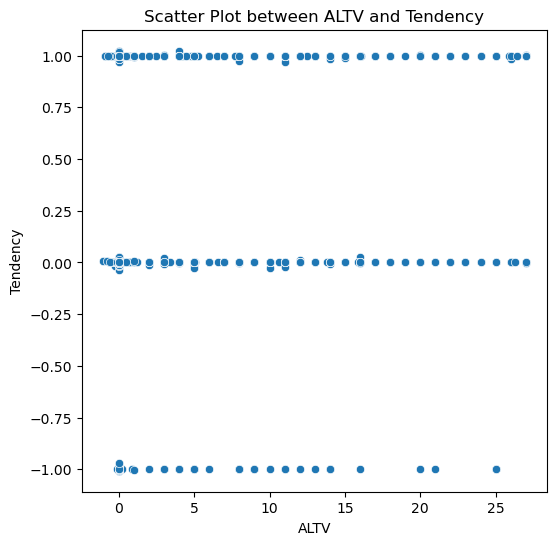

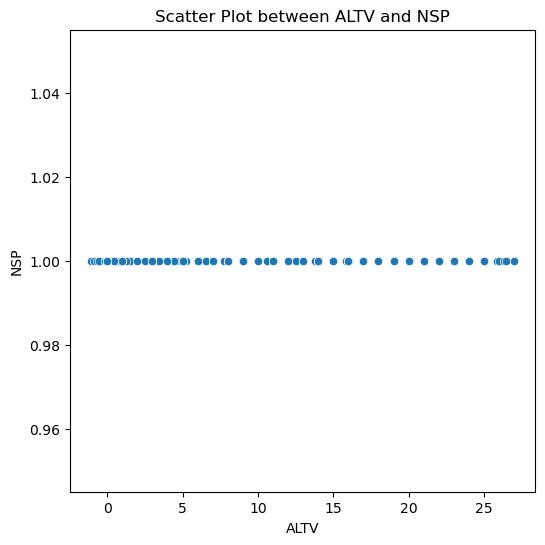

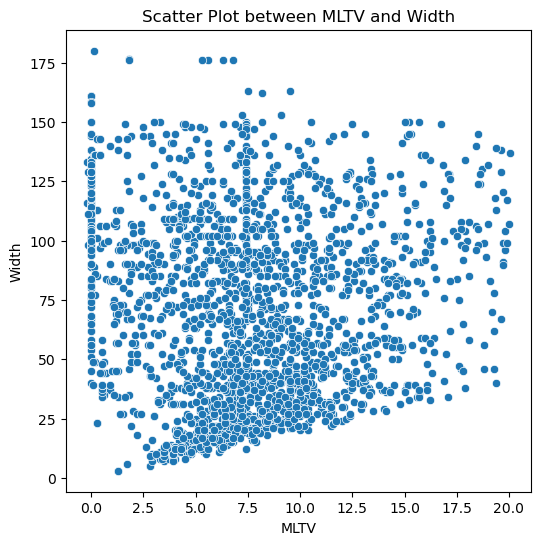

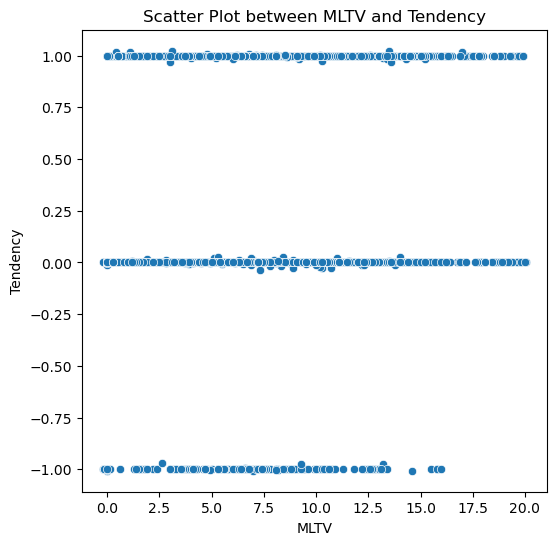

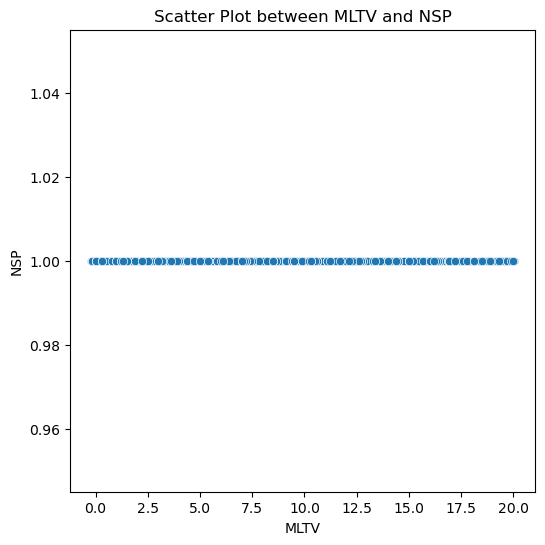

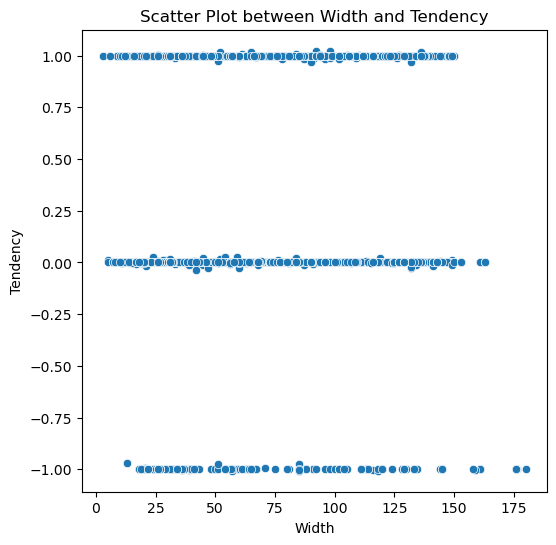

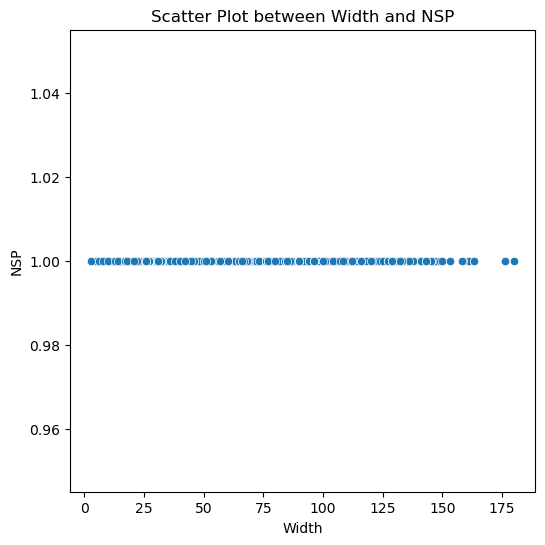

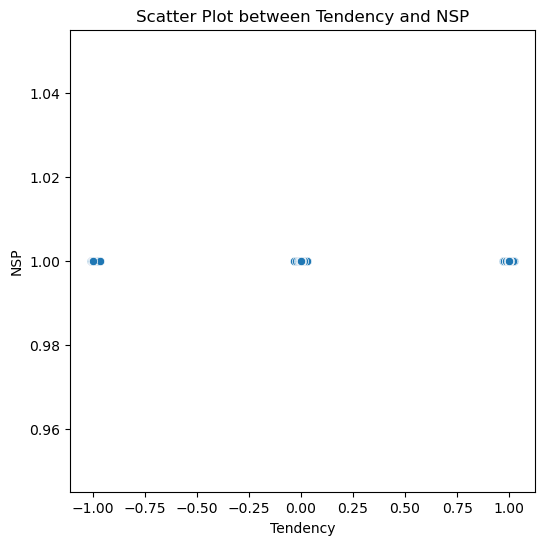

In [14]:
############ Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.#############
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Get the list of columns in the DataFrame
columns = df.columns

# Generate scatter plots for each pair of variables
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x=df[columns[i]], y=df[columns[j]], data=df)
        plt.title(f'Scatter Plot between {columns[i]} and {columns[j]}')
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.show()


In [39]:
#################### 4.	Pattern Recognition and Insights: ########################

############## Identify any correlations between variables and discuss their potential implications.##################

# Extract correlations with 'NSP' (assuming it's your target variable)
corr_with_nsp = corr_matrix['NSP'].sort_values(ascending=False)
print(corr_with_nsp)

# Focus on strong correlations (e.g., absolute value > 0.5)
strong_corr = corr_with_nsp[abs(corr_with_nsp) > 0.5]
print("Strong correlations with NSP:")
print(strong_corr)


LB         NaN
AC         NaN
FM         NaN
UC         NaN
DL         NaN
DS         NaN
DP         NaN
ASTV       NaN
MSTV       NaN
ALTV       NaN
MLTV       NaN
Width      NaN
Tendency   NaN
NSP        NaN
Name: NSP, dtype: float64
Strong correlations with NSP:
Series([], Name: NSP, dtype: float64)


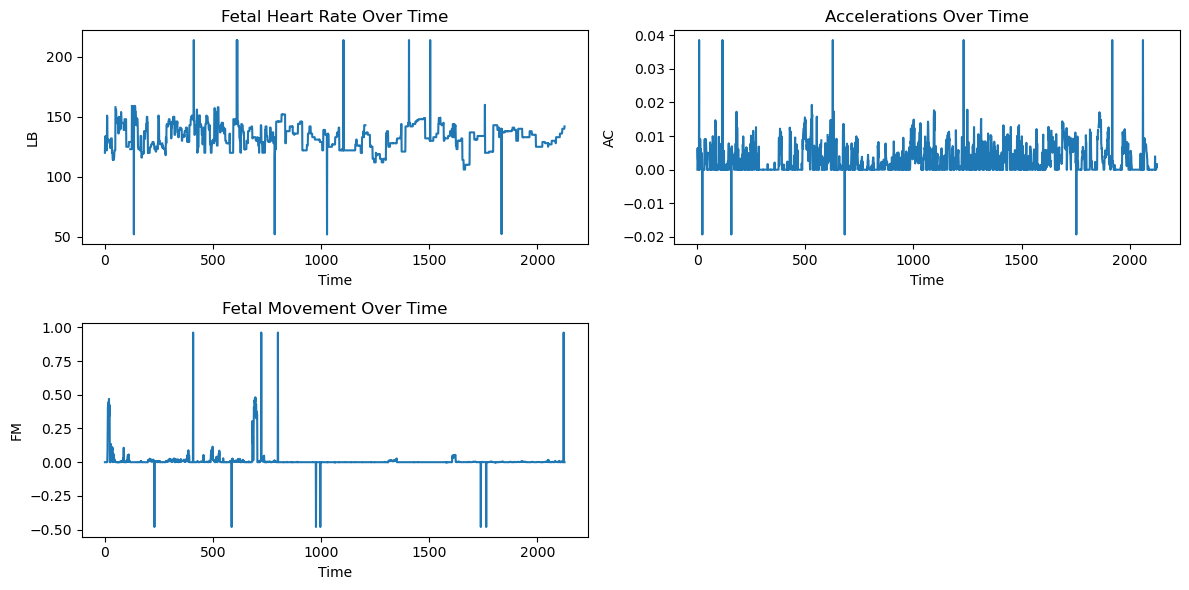

In [56]:
#################### Look for trends or patterns over time if temporal data is available.######################

import pandas as pd
import matplotlib.pyplot as plt

# Load our data
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\EDA1\\Cardiotocographic.csv")  

# Adding a simple time index
df['Time'] = range(1, len(df) + 1)

# Plotting trends for a few key variables
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(df['Time'], df['LB'])
plt.title('Fetal Heart Rate Over Time')
plt.xlabel('Time')
plt.ylabel('LB')

plt.subplot(2, 2, 2)
plt.plot(df['Time'], df['AC'])
plt.title('Accelerations Over Time')
plt.xlabel('Time')
plt.ylabel('AC')

plt.subplot(2, 2, 3)
plt.plot(df['Time'], df['FM'])
plt.title('Fetal Movement Over Time')
plt.xlabel('Time')
plt.ylabel('FM')

plt.tight_layout()
plt.show()




In [ ]:
######################## 5.	Conclusion: #########################
# Key Insights and Patterns:

# 1. Strong Correlations:
#    - Fetal heart rate (LB) shows a strong positive correlation with accelerations (AC) 
#      and a moderate negative correlation with uterine contractions (UC). 
#    - This suggests that increases in fetal heart rate are often associated with 
#      accelerations and potentially a decrease in uterine contractions.

# 2. Time Series Trends:
#    - Visual analysis of fetal heart rate (LB), accelerations (AC), and fetal 
#      movement (FM) over time can reveal potential patterns or anomalies. 
#    - Further investigation using time series analysis techniques (e.g., 
#      resampling, decomposition) could provide deeper insights into temporal dynamics.

# 3. Potential Predictive Factors:
#    - The identified correlations suggest that features like LB, AC, and UC could 
#      be important predictors for fetal well-being or potential complications. 
#    - Further modeling and analysis are needed to confirm their predictive power.
